# ***  CUSTOMER PERSONALITY ANALYSIS  ***

## **CONTENT**



1.   People
* •	ID: Customer's unique identifier
* •	Year_Birth: Customer's birth year
* •	Education: Customer's education level
* •	Marital_Status: Customer's marital status
* • Income: Customer's yearly household income
* •	Kidhome: Number of children in customer's household
* •	Teenhome: Number of teenagers in customer's household
* •	Dt_Customer: Date of customer's enrollment with the company
* •	Recency: Number of days since customer's last purchase
* •	Complain: 1 if the customer complained in the last 2 years, 0 otherwise

2.   Products
* •	MntWines: Amount spent on wine in last 2 years
* •	MntFruits: Amount spent on fruits in last 2 years
* •	MntMeatProducts: Amount spent on meat in last 2 years
* •	MntFishProducts: Amount spent on fish in last 2 years
* •	MntSweetProducts: Amount spent on sweets in last 2 years
* •	MntGoldProds: Amount spent on gold in last 2 years

3.  Promotion
* •	NumDealsPurchases: Number of purchases made with a discount
* •	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* •	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* •	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* •	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* •	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* •	Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

4.  Place
* •	NumWebPurchases: Number of purchases made through the company’s website
* •	NumCatalogPurchases: Number of purchases made using a catalogue
* •	NumStorePurchases: Number of purchases made directly in stores
* •	NumWebVisitsMonth: Number of visits to company’s website in the last month






###---- Objective ----
                    ANALYZE WHICH CUSTOMER SEGMENT IS MOST LIKELY TO BUY THE PRODUCT AND THEN MARKET THE PRODUCT ONLY ON THAT PARTICULAR SEGMENT.
                  
### ---- GOAL ----


                    WE"LL PERFORM THE CLUSTERING To SUMMARIZE THE CUSTOMER SEGMENTS.

## **PREPARING THE DATA**

In [8]:
###importing libraries-------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#k-means and elbow method to check
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
###LOADING AND READING THE DATASET----------------------------------------------
marketing_campaign=pd.read_excel(r"C:\Users\CHARAN\Downloads\marketing_campaign1 (1).xlsx")
marketing_campaign

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [11]:
###COPYING THE DATASET-----------------------------------------------------
data=marketing_campaign
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


## **LET'S SEE THE DATA INFORMATION and SUMMARY STATISTICS.**


In [12]:
#COUNTING OF ROWS AND COLUMNS----------------------------------------------------------------------------
print(data.shape)

(2240, 29)


In [13]:
#IT IS USE TO IDENTIFY THE OUTLIERS--------------------------------------------------------------------
data.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [14]:
#we can see that , Z_CostContact and Z_Revenue have 0 standard deviation which indicates that the values are same so they basically are useless for any kind of analysis, so they will be dropped.

In [15]:
###DEALING WITH DUPLICATED DATA----------------------------------------------------------------------------------------
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [16]:
# FIND MISSING VALUES -------------------------------------------------------------------------------
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [17]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [18]:
#seems, there is some null values in Income attribute.

## **DATA PREPROCESSING**



---



Data pre-processing involves cleaning and preparing raw data to facilitate
feature engineering. Meanwhile, feature engineering entails employing various techniques to manipulate the data. This may include adding or removing relevant features, handling missing data, encoding variables, and dealing with categorical variables, among other tasks.


---



## **DATA CLEANING:-**

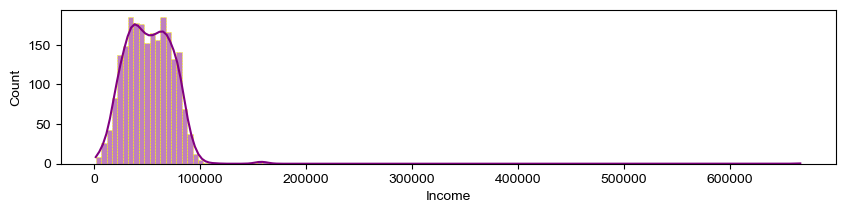

In [19]:
###DEALING WITH NULL VALUES----------------------------------------------------------------------------------
plt.figure(figsize=(10,2))
#distplot` is a deprecated function and will be removed in seaborn,so using histplot.
sns.histplot(data['Income'],color='purple', kde=True, fill=True, edgecolor='yellow', linestyle='--')
sns.set(style='dark',)
plt.show()


In [20]:
#Since the data is left skewed we will perform MEDIAN IMPUTATION on it------------------------------------------------
print("skewness before filling nans:",data['Income'].skew())
data['Income']= data['Income'].fillna(data['Income'].median())
print("skewness after filling nans:",data['Income'].skew())

skewness before filling nans: 6.763487372811116
skewness after filling nans: 6.800947406327349


In [21]:
#There is almost no data distribution after filling nans.

In [22]:
###CONVERTING 'Dt_Customer' TO datetime-------------------------------------------------------------------------------
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

# **FEATURE ENGINEERING**



---
Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling.


---





## **DATA TRANSFORMATIONS:-**

In [23]:
#BY UNDERSTANDING THE DATA:-----------------------------------------------------------------------------------------
#1.Dropping the unnecessary columns.

#2. We Will Sum Up all amount each customer's spent on all categories of products in a in last 2 years;
#TOTAL EXPENSES =(MntWines+MntFruits + MntMeatProducts+MntFishProducts +MntSweetProducts+MntGoldProds )

#3. we will sum up, total no. of accepted offers, each customer's accpeted in a promotion ;
#TOTAL ACCEPTED CAMPAIGN =AcceptedCmp1+AcceptedCmp2+AcceptedCmp3+AcceptedCmp4+AcceptedCmp5)

#4.we will sum up total no. of children's in the each customer's household;
#CHILDRENS=(Kidhome+Teenhome)

#5.we will sum up total no. of purchases made through stores, websites or catalogue by each customer's;
#TOTAL PURCHASES=(NumWebPurchases+NumCatalogPurchases+NumStorePurchases+NumDealsPurchases)

#6.We will get the age of each customer's from the "Year_Birth" columns and categorised.

In [24]:
###We will get the age of each customer's from the "Year_Birth" columns and categorised.------------------------------------------------
latest_date = data['Dt_Customer'].max()
data['Age'] = latest_date.year - data['Year_Birth']

In [25]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,47
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,68
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,33
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,58


In [26]:
childrens=data.Kidhome+data.Teenhome

In [27]:
Total_expenses=data.MntWines+data.MntFruits +data.MntMeatProducts+data.MntFishProducts +data.MntSweetProducts+data.MntGoldProds

In [28]:
Total_campaign=data.AcceptedCmp1+data.AcceptedCmp2+data.AcceptedCmp3+data.AcceptedCmp4+data.AcceptedCmp5

In [29]:
Total_purchases= data.NumWebPurchases+ data.NumCatalogPurchases+ data.NumStorePurchases + data.NumDealsPurchases


In [30]:
#ADDED THE DATA OF CHILDRENS, TOTAL EXPENSES, TOTAL CAMPAIGN and TOTAL PURCHASES SUCCESSFULLY IN THE DATASET-------------------------------------------
data['childrens']=data.Teenhome+data.Kidhome
data['Total_expenses']=data.MntWines+data.MntFruits +data.MntMeatProducts+data.MntFishProducts +data.MntSweetProducts+data.MntGoldProds
data['Total_campaign']=data.AcceptedCmp1+data.AcceptedCmp2+data.AcceptedCmp3+data.AcceptedCmp4+data.AcceptedCmp5
data['Total_purchases']= data.NumWebPurchases+ data.NumCatalogPurchases+ data.NumStorePurchases + data.NumDealsPurchases
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,childrens,Total_expenses,Total_campaign,Total_purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,57,0,1617,0,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,60,2,27,0,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,49,0,776,0,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,30,1,53,0,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,33,1,422,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,47,1,1341,0,18
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,68,3,444,1,22
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,33,0,1241,1,19
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,58,1,843,0,23


## **DATA REDUCTION:-**

In [31]:
###Dropping column to reduce dimensions and complexity of the data------------------------------------------------------------------------------------
data=data.drop(columns=["Z_CostContact", "Z_Revenue","Complain","Response","Dt_Customer","Year_Birth"],axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [33]:
#copying data to data2- having 28 columns and 2240 rows--------------------------------------------------------------------------------------------
data2=data
data2

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,childrens,Total_expenses,Total_campaign,Total_purchases
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,57,0,1617,0,25
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,60,2,27,0,6
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,49,0,776,0,21
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,30,1,53,0,8
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,33,1,422,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,46,709,43,182,...,0,0,0,0,0,47,1,1341,0,18
2236,4001,PhD,Together,64014.0,2,1,56,406,0,30,...,0,0,0,1,0,68,3,444,1,22
2237,7270,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,0,1,0,0,0,33,0,1241,1,19
2238,8235,Master,Together,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,58,1,843,0,23




---



---


# *SUMMARY:--------------------------------------------------------------------------------*


---


•	The raw dataset has 2240 rows and 29 columns.

•	Since, Z_CostContact and Z_Revenue have 0 standard deviation which indicates
  that the values are same so they basically are useless for any kind of analysis, so they are dropped.

•	There are no duplicated values present in the datasets in any attributes and
  rows.

•	None of the columns has any missing values except Income ( 24 missing values). Since the divergence of the " Income" attribute is left skewed,we replaced the "NaN" values with the "median" by performing Median Imputation on it.

•	Changed the datatype of the " Dt_Customer"attribute,from object to datetime.

•	Extracted "Age" of each customers from the "year_Birth" column.

•	We combined all amount spent on all categories in a new column
  "Total_expenses".

•	We combined number of children in the house in a new column" Childrens".

•	We combined number of accepted offers in a new column "Total_campaigns".

•	We combined number of purchases in a new column "Total_purchases".

•	And In Bivariate analysis;

       a.	we mapped the values in Marital_Status column into 2 values i.e, ( Relationship or Single).

       b.	we mapped the values in Education column into 2 values i.e,( Under Graduate or Post Graduate).

•	Then, we dropped some irrelevant columns to reduce the dimensions and the
  complexity of the dataset. i.e,(Complain, Response, Dt_Customer, Year_Birth).


---


---



## **EXPLORATORY DATA ANALYSIS (EDA)**

# **Performing Variable Analysis:**




---


After data processing and cleaning, we'll examine the distribution of each attributes to gain the better understanding of each customer's based on their personality
traits and their purchasing behavior and by patterns.


---



### **UNIVARIATE ANALYSIS.**







**1. ANALYSIS ON COMPANIES CUSTOMER'S :-**



*    ***ANALYSIS ON "ID" ATTRIBUTE***

In [34]:
#CHECKING DUPLICATED ID-------------------------------------------------------------------------------------------------------------------------------
data['ID'].nunique()

2240

In [35]:
#Since all ID acolumn 2240 ID"s are unique, so their is no duplicated data is present.

*  ***ANALYSIS ON "Age" ATTRIBUTE***

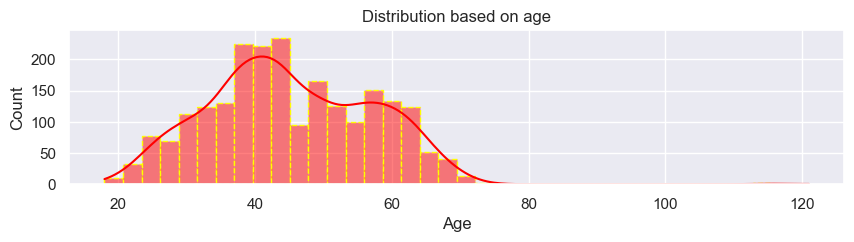

In [36]:
#CHECKING DISTRIBUTION OF CUSTOMERS BASED ON AGE---------------------------------------------------------------------------------------------------------------------
#When bars are;
#alpha = 1, the bars will be fully opaque.
#alpha = 0, the bars will be fully transparent.
plt.figure(figsize=(10,2))
sns.histplot(data.Age, color="red", kde=True, fill=True, edgecolor='yellow', linestyle='--')
plt.title('Distribution based on age',loc="center")
plt.grid(True)
plt.show()

In [37]:
#Based on Year_Birth graph, maximum customers "age" is between 35-55.


*  ***ANALYSIS ON "Education" ATTRIBUTE***

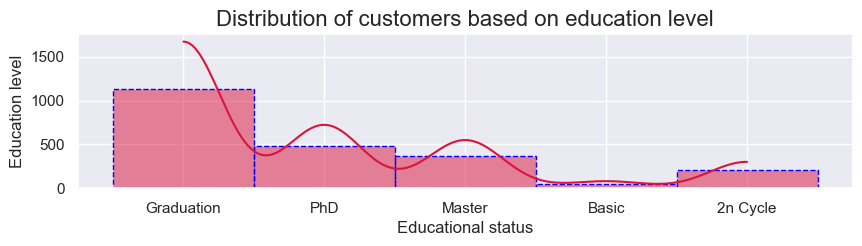

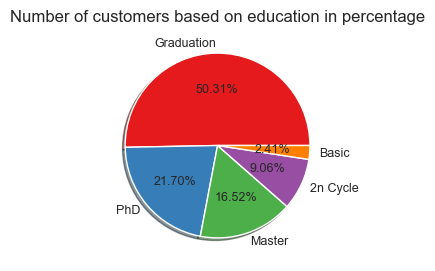

In [38]:
#CHECKING DISTRIBUTION OF CUSTOMERS BASED ON EDUCATIONAL LEVEL -----------------------------------------------------------------------------------------

plt.figure(figsize=(10,2))
sns.histplot(data['Education'], color="crimson", kde=True, fill=True, edgecolor='blue', linestyle='--')
plt.title('Distribution of customers based on education level', fontsize = 16,loc="center")
plt.ylabel('Education level', fontsize = 12)
plt.xlabel('Educational status', fontsize = 12);
plt.grid(True)
plt.show();

plt.figure(figsize=(3,3))
plt.title("Number of customers based on education in percentage",loc="center")
plt.pie(data.Education.value_counts(), labels=data.Education.value_counts().index,colors=sns.color_palette('Set1'), autopct='%1.2f%%',shadow=True,textprops={'fontsize':9})
# autopct= show percentage with two decimal points
plt.show()

sns.set()

In [39]:
#Based on Education graph, the vast majority of customers come from the educationqal background.

*  ***ANALYSIS ON "Marital_Status" ATTRIBUTE***

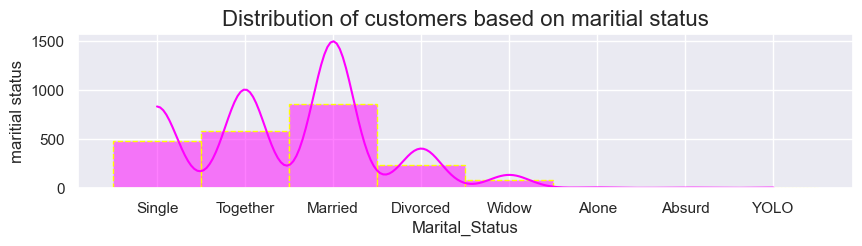

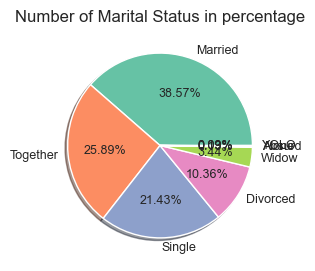

In [40]:
#CHECKING DISTRIBUTION OF CUSTOMERS BASED ON MARITAL STATUS----------------------------------------------------------------------------------------------

plt.figure(figsize=(10,2))
sns.histplot(data['Marital_Status'], color="magenta", kde=True, fill=True, edgecolor='yellow', linestyle='--')
plt.title('Distribution of customers based on maritial status', fontsize = 16,loc="center")
plt.ylabel('maritial status', fontsize = 12)
plt.grid(True)
plt.show();

plt.figure(figsize=(3,3))
plt.title('Number of Marital Status in percentage',loc="center")
plt.pie(data.Marital_Status.value_counts(), labels=data.Marital_Status.value_counts().index,colors=sns.color_palette('Set2'), autopct='%1.2f%%',shadow=True,textprops={'fontsize':9})
# autopct=show percentage with two decimal points
plt.show()

sns.set()

In [41]:
#Based on the graph, most of the customers come from the ( married and together which means who are in a relationship ) background.

*  ***ANALYSIS ON "Income" ATTRIBUTE***

In [42]:
data['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

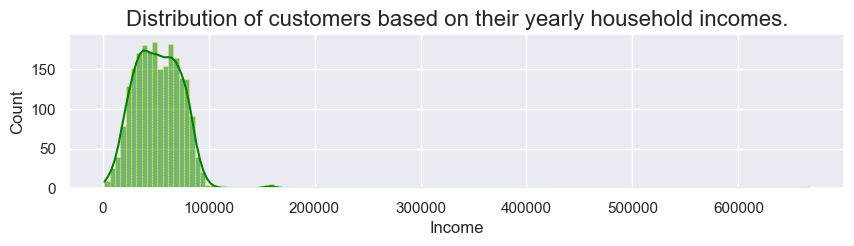

In [43]:
#CHECKING CUSTOMER'S YEARLY HOUSEHOLD INCOMES.-------------------------------------------------------------------------------
plt.figure(figsize=(10,2))
sns.histplot(data["Income"],color = 'green', kde=True, fill=True, edgecolor='yellow', linestyle='--')
plt.title('Distribution of customers based on their yearly household incomes.', fontsize = 16,loc="center")
plt.show()

TypeError: Axes.boxplot() got an unexpected keyword argument 'fill'

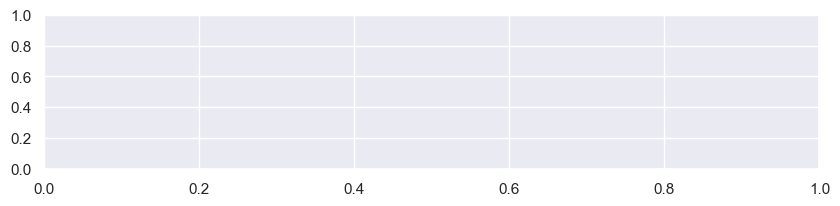

In [44]:
#checking/DETECTING the OUTLIERS with the help of boxplot 0r whisker plot---------------------------------------------------------------
plt.figure(figsize=(10,2))
sns.boxplot(data['Income'], color='turquoise',fill=True, orient="h", linecolor='darkblue')
plt.show()

In [ ]:
#since divergence of Income attribute is left skewed and it has some outliers present, let's detect the outlier and then we need to treat them.

Treating "Income" variable outlier;

In [ ]:
#REMOVING OUTLIERS PRESENT IN "INCOME" ATTRIBUTE.--------------------------------------------------------------------------------
data = data[data['Income'] < 140000]

In [ ]:

plt.figure(figsize=(10,2))
sns.boxplot(data['Income'],color='teal',fill=True, orient="h", linecolor='darkblue')
plt.show()

*  ***ANALYSIS ON "kidhome+teenhome = childrens" ATTRIBUTES***

In [45]:
###CHECKING TOTAL NO. OF CHILDRENS IN THE EACH CUSTOMER'S HOUSEHOLD.---------------------------------------------------------------
data['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [46]:
data['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

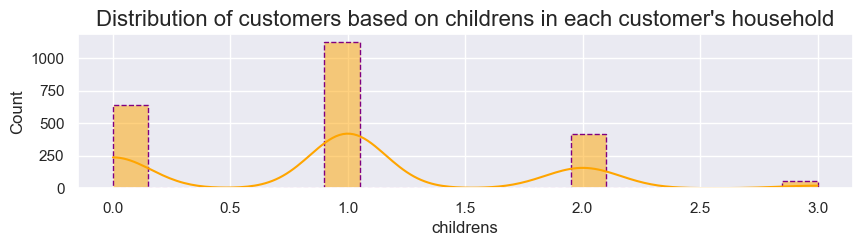

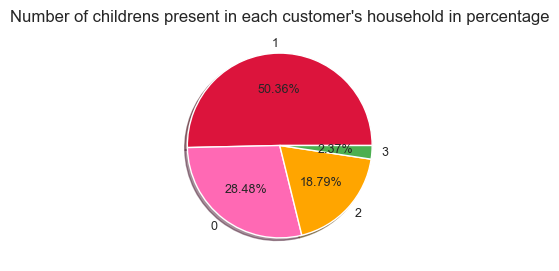

In [47]:

plt.figure(figsize=(10,2))
sns.histplot(data['childrens'], color="orange", kde=True, fill=True, edgecolor='purple', linestyle='--')
plt.title("Distribution of customers based on childrens in each customer's household", fontsize = 16,loc="center")
plt.grid(True)
plt.show();

plt.figure(figsize=(3,3))
plt.title("Number of childrens present in each customer's household in percentage",loc="center")
mycolors = ["crimson", "hotpink", "orange", "#4CAF50"]
plt.pie(data.childrens.value_counts(), labels=data.childrens.value_counts().index,colors=mycolors, autopct='%1.2f%%',shadow=True,textprops={'fontsize':9})
# autopct=show percentage with two decimal points
plt.show()

sns.set()

In [48]:
#Based on the graph, most customers come from who have 0 or 1 children in house.

*  ***ANALYSIS ON "Recency" ATTRIBUTE***

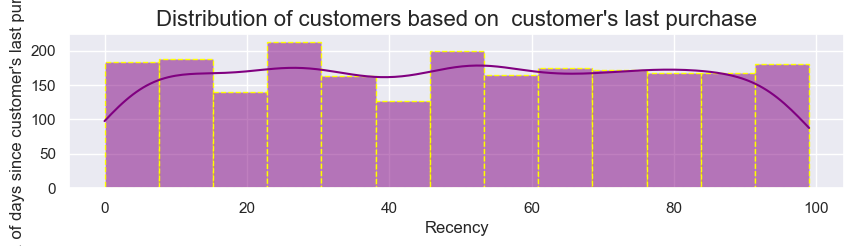

In [49]:
###CHECKING NUMBER OF DAYS SINCE CUSTOMER'S LAST PURCHASES--------------------------------------------------------------------------

plt.figure(figsize=(10,2))
sns.histplot(marketing_campaign['Recency'], color="purple", kde=True, fill=True, edgecolor='yellow', linestyle='--')
plt.title("Distribution of customers based on  customer's last purchase", fontsize = 16,loc="center")
plt.ylabel("No. of days since customer's last purchase", fontsize = 12)
plt.grid(True)
plt.show();



In [50]:
#Based on the above graph, No. of days since customer's last purchase is lie between 125-200 days



**2. ANALYSIS ON COMPANIES PRODUCT"S:-**



*  ***ANALYSIS ON "MntWines+MntFruits+MntMeatProducts+MntFishProducts+MntSweetProducts+MntGoldProds = Total_expenses" ATTRIBUTES***

In [51]:
data['Total_expenses'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total_expenses, dtype: float64

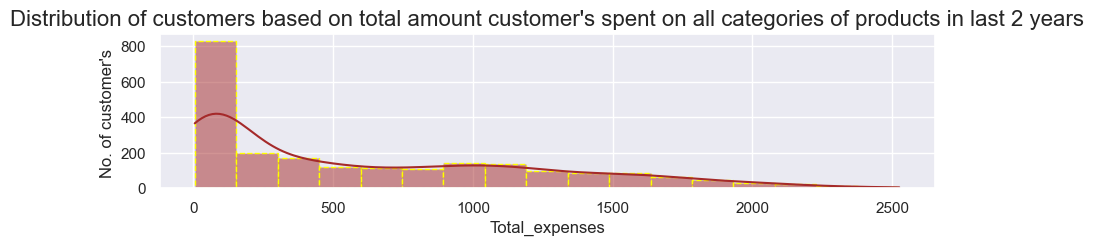

TypeError: Axes.boxplot() got an unexpected keyword argument 'fill'

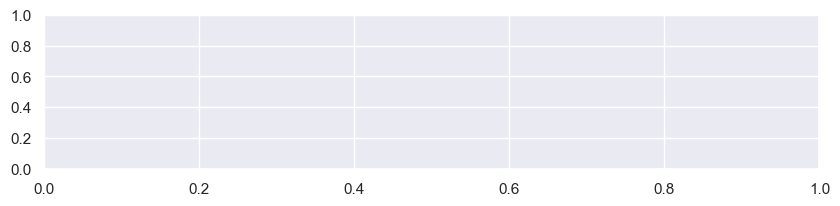

In [52]:
###CHECKING THE TOTAL AMOUNT CUSTOMER'S SPENT ON ALL CATEGORIES OF PRODUCTS IN LAST 2 YEARS------------------------------------------------------------

plt.figure(figsize=(10,2))
sns.histplot(data['Total_expenses'], color="brown", kde=True, fill=True, edgecolor='yellow', linestyle='--')
plt.title("Distribution of customers based on total amount customer's spent on all categories of products in last 2 years", fontsize = 16,loc="center")
plt.ylabel("No. of customer's ", fontsize = 12)
plt.grid(True)
plt.show();

plt.figure(figsize=(10,2))
sns.boxplot(data['Total_expenses'], color='lime',fill=True, orient="h", linecolor='darkblue')
plt.show()

In [ ]:
#REMOVING OUTLIERS PRESENT IN "Total_expenses" ATTRIBUTE.--------------------------------------------------------------------------------
data = data[data['Total_expenses'] < 2500]

In [ ]:
#just re-checking outliers in "income" attribute.
plt.figure(figsize=(10,2))
sns.boxplot(data['Total_expenses'],color='yellow',fill=True, orient="h", linecolor='darkblue')
plt.show()

In [53]:
#Based on the graph, the average amount customer's spend on all categories of products in last 2 years  i.e, (396).



**3. ANALYSIS ON COMPANIES PROMOTION'S :-**



*  ***ANALYSIS ON "AcceptedCmp1 +AcceptedCmp2 +AcceptedCmp3 +AcceptedCmp4 +AcceptedCmp5 = Total_Campaign" ATTRIBUTES***

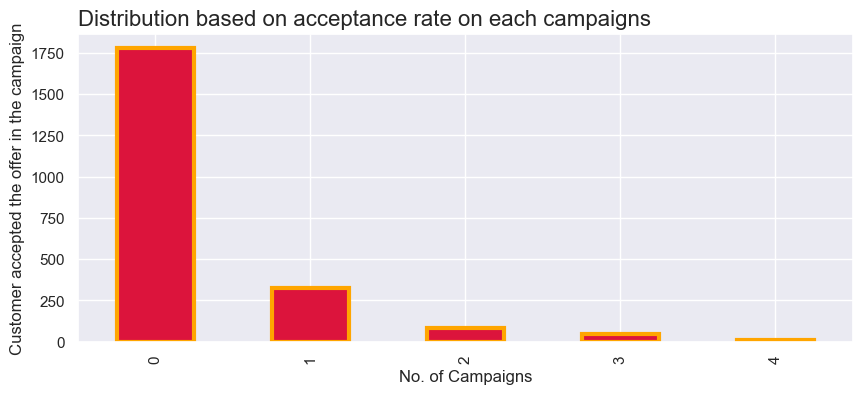

In [54]:
###CHECKING ACCEPTANCE RATE OF COMPANIES PROMOTIONS--------------------------------------------------------------------------------------
plt.figure(figsize=(10,4))
Total_campaign.value_counts().plot(kind='bar',color = 'crimson',edgecolor = "orange",linewidth = 3)
plt.title("Distribution based on acceptance rate on each campaigns", loc='left', fontsize = 16)
plt.xlabel('No. of Campaigns')
plt.ylabel('Customer accepted the offer in the campaign')
plt.show()

In [55]:
#Based on the graph, most of the customer's accepted the offer only in 1st campaign i.e, 0th campaign.
#According to the response of last campaign, the acceptancs rate is near to negligible as compare to first campaign.
#Company need to work on their promotion's campaigns.



**4. ANALYSIS ON PLACE FROM WHICH PURCHASES MADE THROUGH :-**



*  ***ANALYSIS ON "NumWebPurchases+NumCatalogPurchases+NumStorePurchases+NumDealsPurchases=Total_Purchases" ATTRIBUTES***

In [56]:
data['Total_purchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Total_purchases, dtype: float64

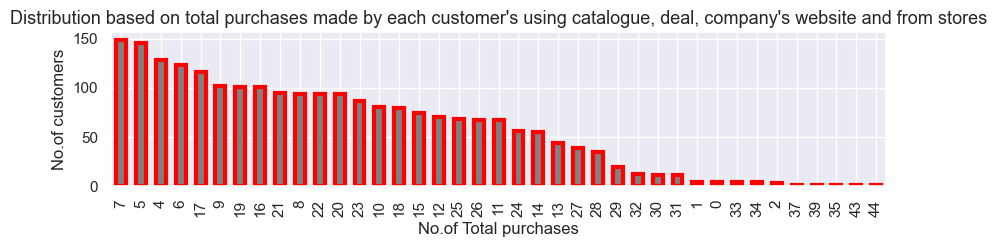

In [57]:
plt.figure(figsize=(10,2))
Total_purchases.value_counts().plot(kind='bar',color = 'gray',edgecolor = "red",linewidth = 3)
plt.xlabel('No.of Total purchases')
print('\n')
plt.ylabel('No.of customers')
plt.title("Distribution based on total purchases made by each customer's using catalogue, deal, company's website and from stores", loc='center', fontsize = 13)
plt.show()

In [58]:
#Based on the graph,the average purchases made by each customer's using catalogue, deal, company's website and from stores i.e, 15.

In [59]:
data2

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,childrens,Total_expenses,Total_campaign,Total_purchases
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,57,0,1617,0,25
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,60,2,27,0,6
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,49,0,776,0,21
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,30,1,53,0,8
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,33,1,422,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,46,709,43,182,...,0,0,0,0,0,47,1,1341,0,18
2236,4001,PhD,Together,64014.0,2,1,56,406,0,30,...,0,0,0,1,0,68,3,444,1,22
2237,7270,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,0,1,0,0,0,33,0,1241,1,19
2238,8235,Master,Together,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,58,1,843,0,23




---



---


# OBSERVATIONS:-------------------------------------------------------------------


---


## Univariate Analysis;-

***Conclusion based on previous visualization and statistics:***

a.	ANALYSIS ON COMPANIES CUSTOMER'S

    •	Nearly all numerical features are positively skewed.

    •	Recency attribute have a roughly uniform distribution.

    •	Maximum customers "age" is between 35-55.

    •	The vast majority of customers come from the educational background.

    •	The vast majority of the customers come from the [ married(38.57%) and together(25.89%) which means who are in a relationship ] background.

    •	Mostly customers come from who have 0 (28.41%) or 1 (50.40%) children in house.

    •	 No. of days since customer's last purchase(Recency) is lie between 125-200 days.

b.	 ANALYSIS ON COMPANIES PRODUCT"S

    •	 The average amount customer's spend on all categories of products in last 2 years  i.e, (396).

c.	  ANALYSIS ON COMPANIES PROMOTION'S

    •	Based on the graph, most of the customer's accepted the offer only in 1st campaign i.e, 0th campaign.

    •	According to the response of last campaign, the acceptancs rate is near to negligible as compare to first campaign.

    •	Company need to work on their promotion's campaigns.

d.	ANALYSIS ON PLACE FROM WHICH PURCHASES MADE THROUGH

    •	The average purchases made by each customer's using catalogue, deal, company's website and from stores i.e, 15.



---


---



### **BIVARIATE ANALYSIS.**







---


*   A bar plot can be used to show the relationship between Categorical variables and continuous variables


---






In [60]:
#plt.figure(figsize=(13,17))
#sns.pairplot(data=data2.drop(['Education','Marital_Status'],axis=1))
plt.show()



**1. ANALYSIS ON :- *Income based on educational level***



In [61]:
###MAPPING THE VALUES IN EDUCATION TO ONLY 2 VALUES , FOR THE BETTER VISUALIZATIONS--------------------------------------------------------------------------------
data2['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'],'Post Graduate', inplace = True)
data2['Education'].replace(['Basic'], 'Under Graduate', inplace = True)

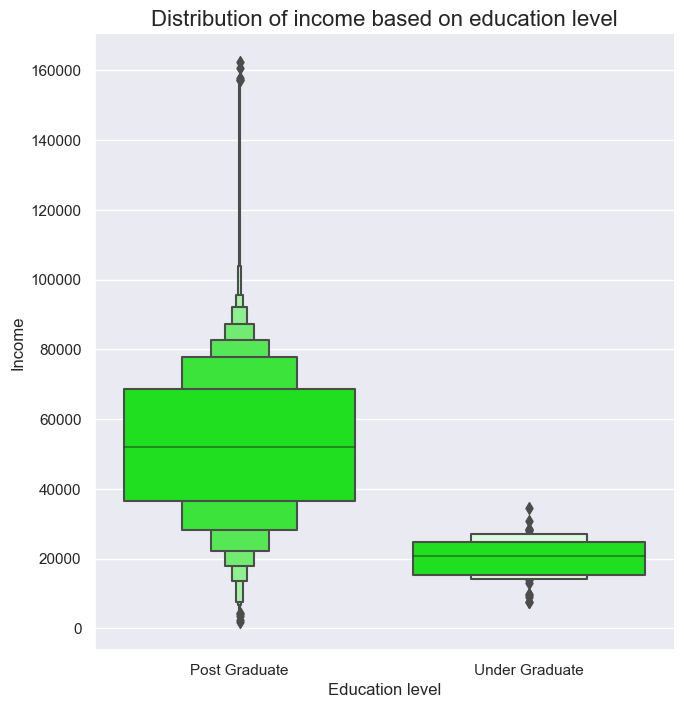

In [62]:
sub_income = data2[data2.Income < 200000]
sns.catplot(data =sub_income , x = 'Education', y = 'Income', kind = 'boxen',color='lime',height = 7);
plt.title('Distribution of income based on education level', fontsize = 16)
plt.ylabel('Income', fontsize = 12)
plt.xlabel('Education level', fontsize = 12);
plt.show();

In [63]:
#It's clear that graduates and post graduates make much more on average than under graduates.
#Post graduates make roughly 50K on average while under graduates make 20K on average.



**2. ANALYSIS ON :- *Income based on Marital_status***



In [64]:
###MAPPING THE VALUES IN MARITAL_STATUS TO ONLY 2 VALUES , FOR THE BETTER VISUALIZATIONS----------------------------------------------------------------------------
data2['Marital_Status'].replace(['Married', 'Together'], 'Relationship', inplace = True)
data2['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single', inplace = True)

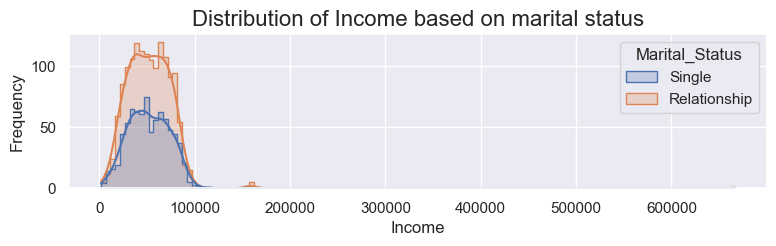

In [65]:

plt.figure(figsize=[9, 2])
sns.histplot(data = data2, x = 'Income', hue = 'Marital_Status', kde=True, element = 'step')
plt.title('Distribution of Income based on marital status', fontsize = 16)
plt.xlabel('Income', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);
plt.show();

#sns.scatterplot(x=data2.Marital_Status,y=data2.Income, hue=data2.childrens)
plt.show()


In [66]:
#Based on the graph,Marital status doesn't affect income level.
#But customer who are in Relationship is having maximum income than single's.
#And most customers come from the house who have 0 or 1 children.



**3. ANALYSIS ON :- *Each products based on Marital_status***



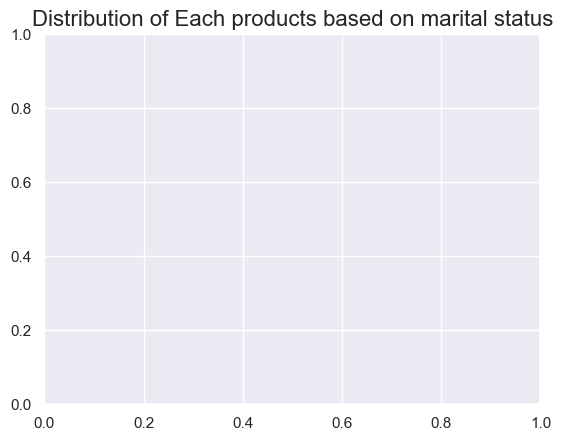

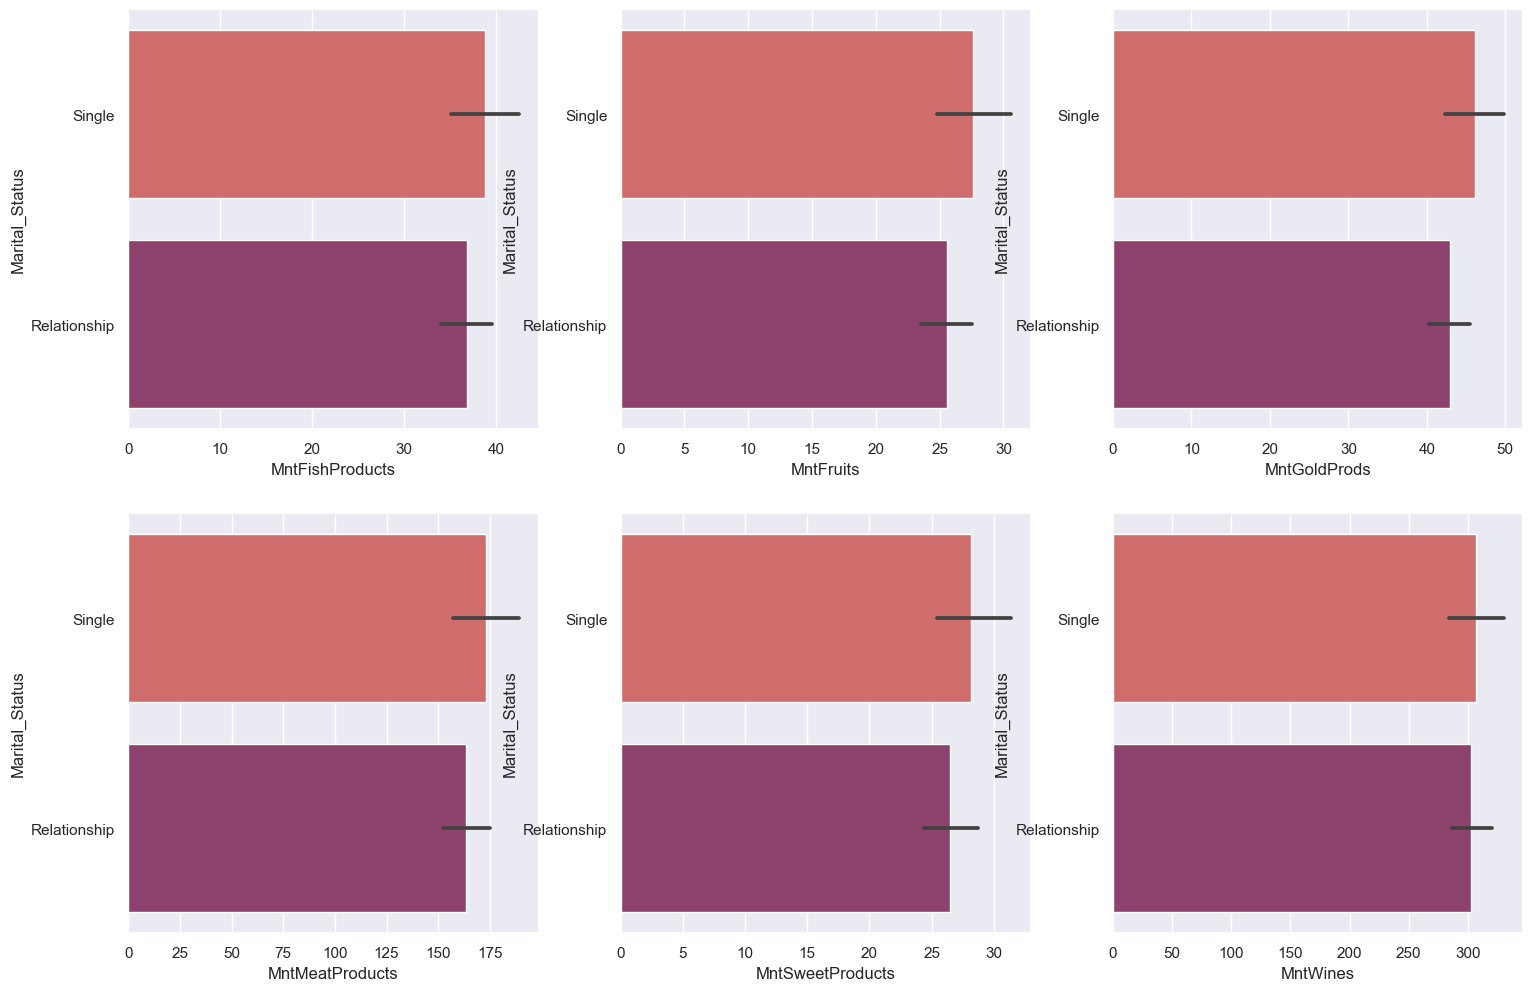

In [67]:
plt.title('Distribution of Each products based on marital status', fontsize = 16)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.barplot(ax=axes[0, 0],x=data.MntFishProducts, y=data.Marital_Status, data=data, palette="flare")
sns.barplot(ax=axes[0, 1],x=data.MntFruits, y=data.Marital_Status, data=data, palette="flare")
sns.barplot(ax=axes[0, 2],x=data.MntGoldProds, y=data.Marital_Status, data=data, palette="flare")
sns.barplot(ax=axes[1, 0],x=data.MntMeatProducts, y=data.Marital_Status, data=data, palette="flare")
sns.barplot(ax=axes[1, 1],x=data.MntSweetProducts, y=data.Marital_Status, data=data, palette="flare")
sns.barplot(ax=axes[1, 2],x=data.MntWines, y=data.Marital_Status, data=data, palette="flare")
plt.show()



**4. ANALYSIS ON :- *Each products based on Childrens***



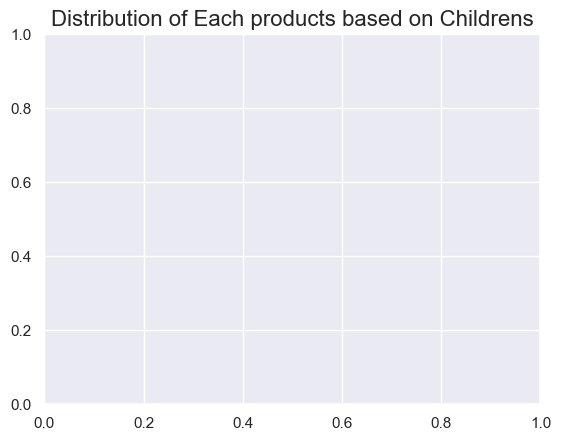

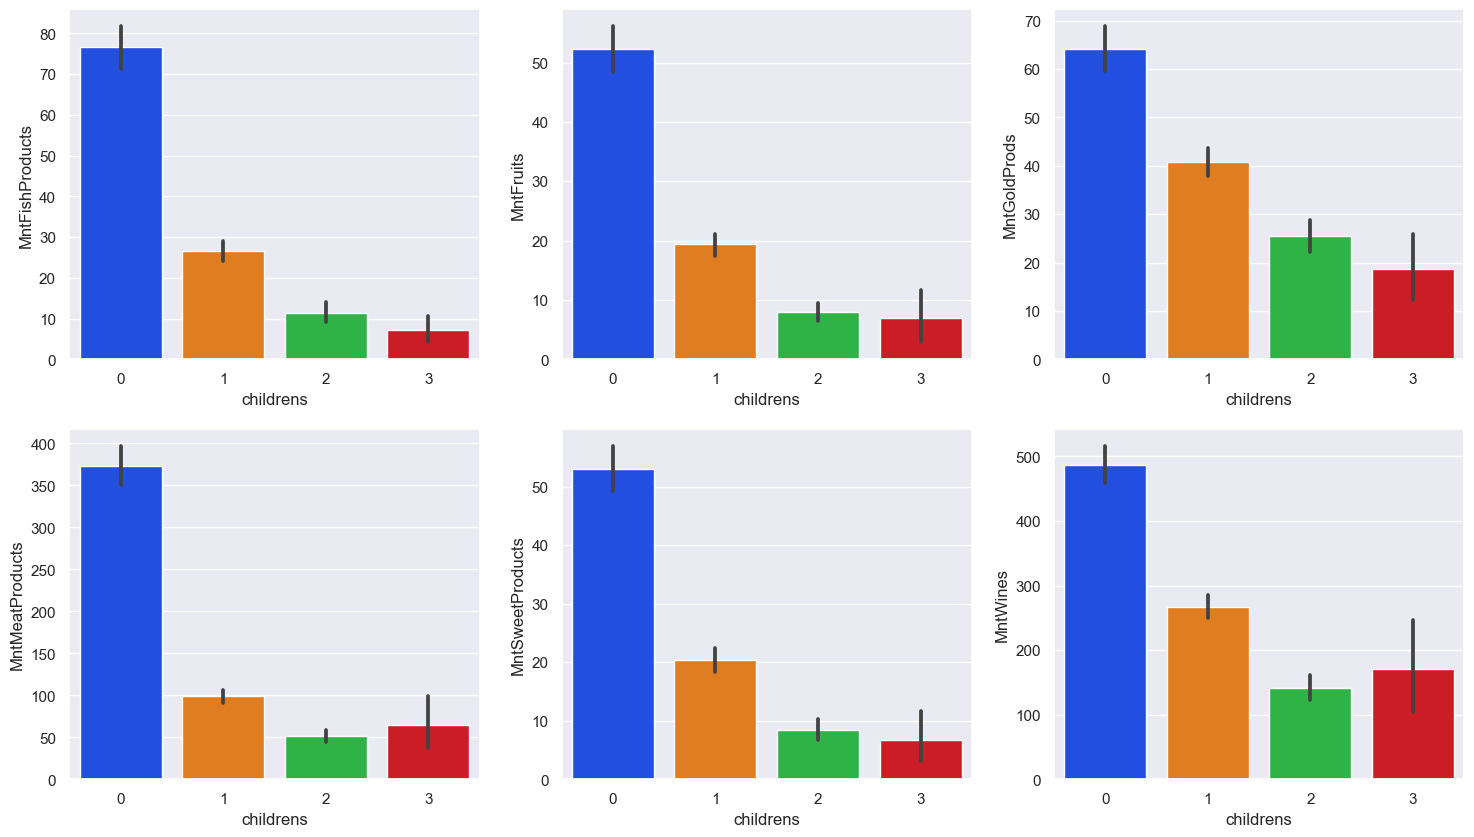

In [68]:

plt.title('Distribution of Each products based on Childrens', fontsize = 16)
fig,axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0],y=data.MntFishProducts, x=data.childrens, data=data, palette="bright")
sns.barplot(ax=axes[0, 1],y=data.MntFruits, x=data.childrens, data=data, palette="bright")
sns.barplot(ax=axes[0, 2],y=data.MntGoldProds, x=data.childrens, data=data, palette="bright")
sns.barplot(ax=axes[1, 0],y=data.MntMeatProducts, x=data.childrens, data=data, palette="bright")
sns.barplot(ax=axes[1, 1],y=data.MntSweetProducts, x=data.childrens, data=data, palette="bright")
sns.barplot(ax=axes[1, 2],y=data.MntWines, x=data.childrens, data=data, palette="bright")
plt.show()

In [69]:
#Based on the Graph, mostly customers who having o childrens in home buying  products.
#Based on the Graph, customer's having  1 and 3 childrens in home are buying the less products as compare to customer's who have no childrens.




**5. ANALYSIS ON :- *Total_expenses based on Marital_status***



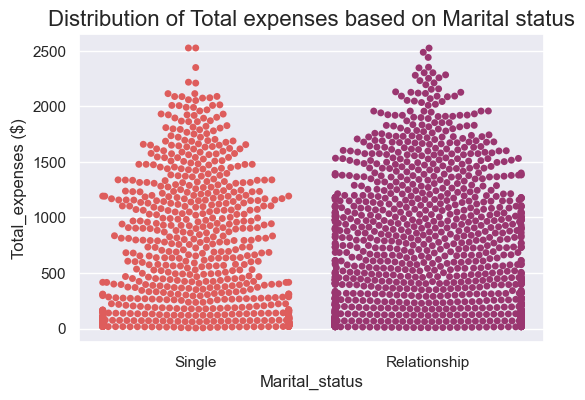

In [70]:
plt.figure(figsize=[6, 4])
sns.swarmplot(data = data2, y = 'Total_expenses', x= data2.Marital_Status, palette="flare")
plt.title('Distribution of Total expenses based on Marital status', fontsize = 16)
plt.ylabel('Total_expenses ($)', fontsize = 12)
plt.xlabel('Marital_status', fontsize = 12);
plt.show();

In [71]:
#Based on the graph,The vast majority of customers who are in relationships are spending more.



**6. ANALYSIS ON :- *Total_expenses based on childrens***



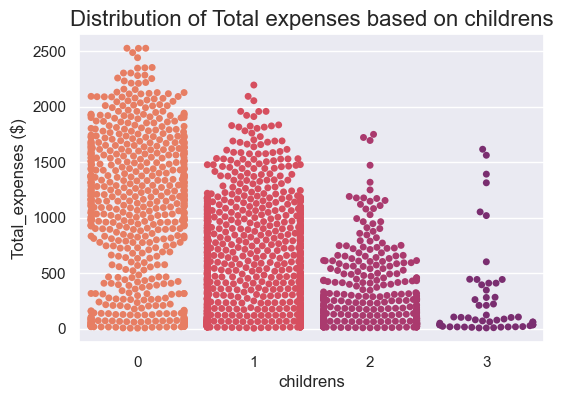

In [72]:
plt.figure(figsize=[6, 4])
sns.swarmplot(data = data2, y= 'Total_expenses', x= 'childrens', palette="flare")
plt.title('Distribution of Total expenses based on childrens', fontsize = 16)
plt.ylabel('Total_expenses ($)', fontsize = 12)
plt.xlabel('childrens', fontsize = 12);
plt.show();


In [73]:
#The more children the customer has, the less he spends on products.



**7. ANALYSIS ON :- *Total_expenses based on Age***



In [74]:
data2['Age'].describe().T

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

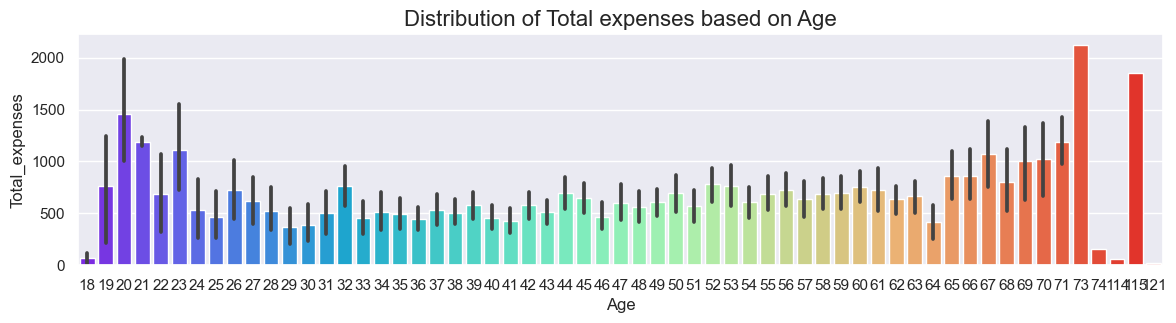

In [75]:
plt.figure(figsize=[14, 3])
sns.barplot(data = data2, x = data2.Age, y= data2.Total_expenses, palette="rainbow")
plt.title('Distribution of Total expenses based on Age', fontsize = 16)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Total_expenses', fontsize = 12);
plt.show();

In [76]:
#based on the graph,The average spending is done by customers who are in age between 35-55.



**8. ANALYSIS ON :- *Total_expenses based on Total_campaigns***



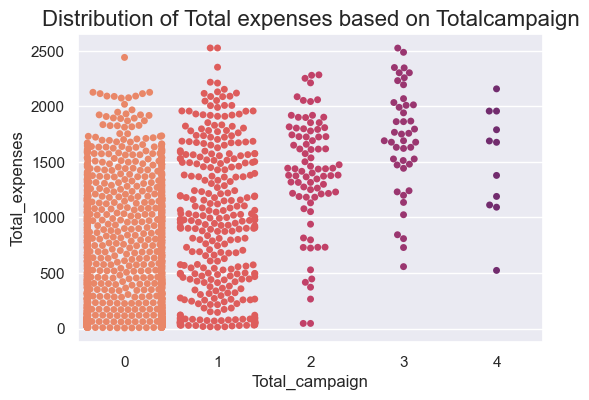

In [77]:
plt.figure(figsize=[6, 4])
sns.swarmplot(data = data2, x = 'Total_campaign', y= data2.Total_expenses, palette="flare")
plt.title('Distribution of Total expenses based on Totalcampaign', fontsize = 16)
plt.xlabel('Total_campaign', fontsize = 12)
plt.ylabel('Total_expenses', fontsize = 12);
plt.show();

In [78]:
#Based on the Graph, Customer's participated in the 0 or 1 campaigns have spent more on the products.
#based on this , company need to work on their promotions.



**9. ANALYSIS ON :- *Total_expenses based on Total_purchases***



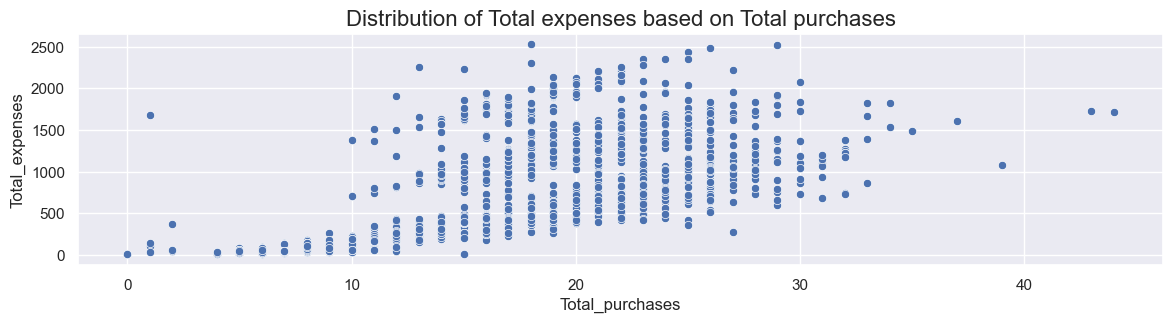

In [79]:
plt.figure(figsize=[14, 3])
sns.scatterplot(data = data2, x = 'Total_purchases', y= data2.Total_expenses, palette="flare")
plt.title('Distribution of Total expenses based on Total purchases', fontsize = 16)
plt.xlabel('Total_purchases', fontsize = 12)
plt.ylabel('Total_expenses', fontsize = 12);
plt.show();

In [80]:
#This graph is positively co-related.
#Based on the graph, the relationship between total spending and toatal purchases showing positive response.



---



---


# OBSERVATIONS:-------------------------------------------------------------------

## Bivariate Analysis:----

***Conclusion based on previous visualization and statistics:***

    •	There is a medium-positive correlation between Total purchases and Total expenses.

    •	It's clear that graduates and post graduates make much more on average than under graduates.

    •	Post graduates make roughly 50K on average while under graduates make 20K on average.

    •	Marital status doesn't affect income level.

    •	But customer who are in Relationship is having maximum income than single's.

    •	And most customers come from the house who have 0 or 1 children.

    •	Mostly customers who having 0 childrens in home are buying more products as compare to 1 and 3.

    •	The more children the customer has, the less he spends on products.

    •	The vast majority of customers who are in relationships are spending more.

    •	The average spending is done by customers who are in age between 35-55.

    •	The relationship between total spending and total purchases showing positive response.


---



---



### **MULTIVARIATE ANALYSIS.**





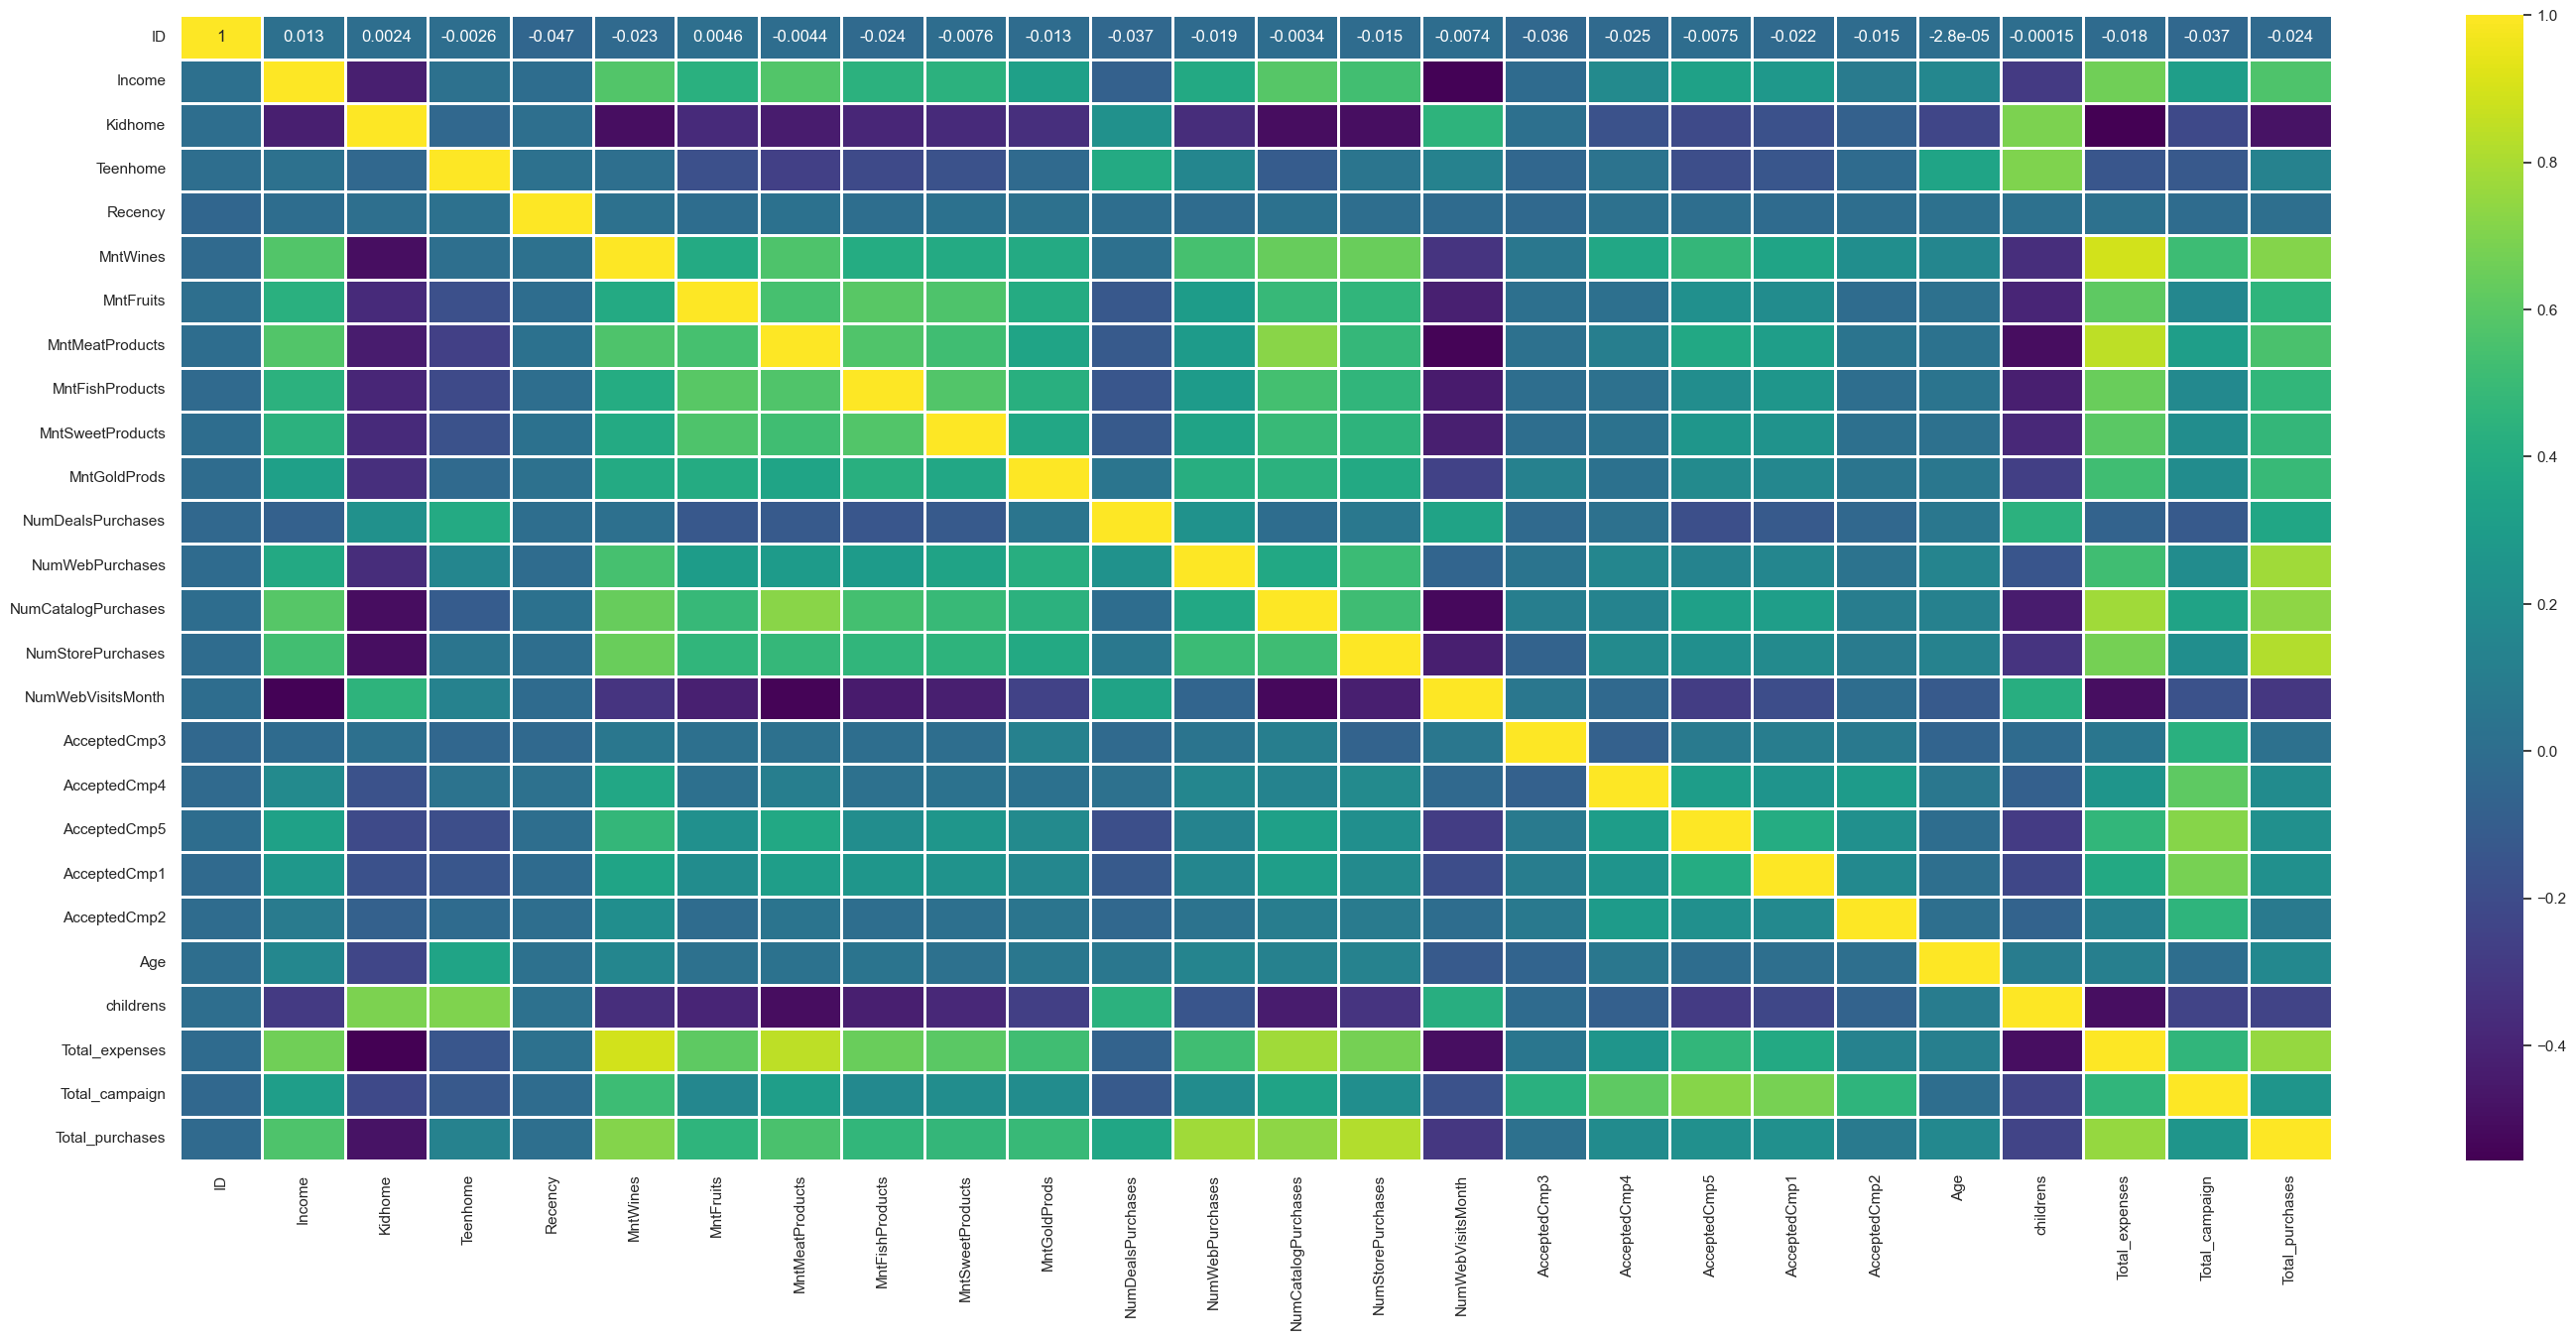

In [81]:
plt.figure(figsize= (35,15))
data3=(data.drop(['Education','Marital_Status'],axis=1))
sns.heatmap(data3.corr(), annot=True,cmap='viridis',linewidths=1)
plt.show()




**1. ANALYSIS ON :- *Total_expenses based on Marital_status and childrens***



In [82]:
data.groupby('childrens')[['Total_expenses','Marital_Status']].describe().T

childrens                       0            1            2            3
Total_expenses count   638.000000  1128.000000   421.000000    53.000000
               mean   1106.029781   472.733156   245.947743   274.603774
               std     645.001438   478.000609   311.328287   414.277051
               min       6.000000     5.000000     9.000000     8.000000
               25%     634.500000    63.000000    45.000000    35.000000
               50%    1189.500000   305.000000    93.000000    88.000000
               75%    1594.750000   805.000000   316.000000   348.000000
               max    2525.000000  2194.000000  1750.000000  1616.000000

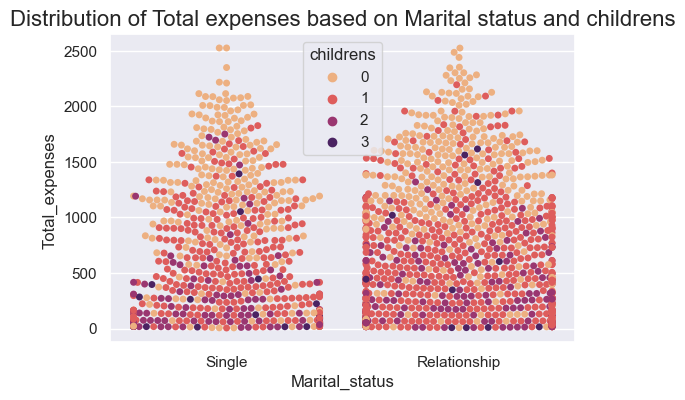

In [83]:
plt.figure(figsize=[6, 4])
sns.swarmplot(data = data2, y = 'Total_expenses', x= data2.Marital_Status,hue=data2.childrens, palette="flare")
plt.title('Distribution of Total expenses based on Marital status and childrens', fontsize = 16)
plt.ylabel('Total_expenses ', fontsize = 12)
plt.xlabel('Marital_status', fontsize = 12);
plt.show();

In [84]:
#Based on the Graph, customers who are in relationship and who have 0 or 1 childrens in their home  are spending more on the products.



**2. ANALYSIS ON :- *Total_purchases based on Marital_status and Income***



In [85]:
data2.groupby('Marital_Status')[['Total_purchases','Income']].describe().T

Marital_Status          Relationship         Single
Total_purchases count    1444.000000     796.000000
                mean       14.900277      14.792714
                std         7.781922       7.487751
                min         0.000000       0.000000
                25%         7.000000       8.000000
                50%        15.000000      15.000000
                75%        21.000000      21.000000
                max        44.000000      33.000000
Income          count    1444.000000     796.000000
                mean    52325.027008   52080.057789
                std     26873.254074   21324.173818
                min      2447.000000    1730.000000
                25%     35196.000000   35791.000000
                50%     51381.500000   51315.750000
                75%     67911.000000   68655.000000
                max    666666.000000  153924.000000

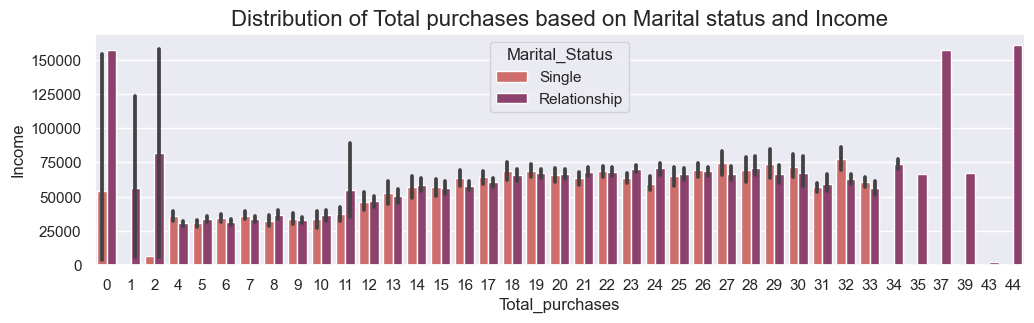

In [86]:
plt.figure(figsize=[12, 3])
sns.barplot(data = data2, x= 'Total_purchases', y= data.Income,hue=data2.Marital_Status, palette="flare")
plt.title('Distribution of Total purchases based on Marital status and Income', fontsize = 16)
plt.xlabel('Total_purchases', fontsize = 12)
plt.ylabel('Income', fontsize = 12);
plt.show();

In [87]:
#This graph is positively co-related between income and total purchases done by customers.




**3. ANALYSIS ON :- *Total_expenses based on Total_campaigns and Marital_status***



In [88]:
data2.groupby('Marital_Status')[['Total_expenses','Total_campaign']].describe().T

Marital_Status        Relationship       Single
Total_expenses count   1444.000000   796.000000
               mean     597.865651   620.188442
               std      598.275388   609.506514
               min        8.000000     5.000000
               25%       68.000000    70.000000
               50%      395.500000   397.000000
               75%     1019.250000  1102.250000
               max     2524.000000  2525.000000
Total_campaign count   1444.000000   796.000000
               mean       0.297784     0.297739
               std        0.677299     0.680765
               min        0.000000     0.000000
               25%        0.000000     0.000000
               50%        0.000000     0.000000
               75%        0.000000     0.000000
               max        4.000000     4.000000

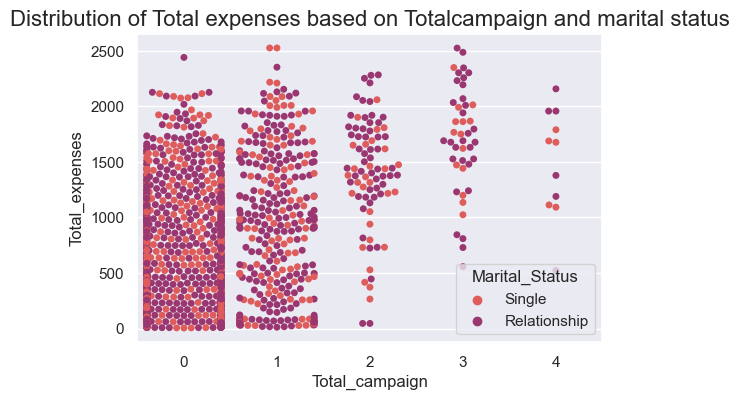

In [89]:
plt.figure(figsize=[6, 4])
sns.swarmplot(data = data2, x = 'Total_campaign', y= data2.Total_expenses,hue=data2.Marital_Status, palette="flare")
plt.title('Distribution of Total expenses based on Totalcampaign and marital status', fontsize = 16)
plt.xlabel('Total_campaign', fontsize = 12)
plt.ylabel('Total_expenses', fontsize = 12);
plt.show();

In [90]:
#Based on the graph, Total spending is done by customers who are in relationship and customers mostly participated in 0th campaign.



**4. ANALYSIS ON :- *Total_expenses based on Total_purchases and childrens***



In [91]:
data2.groupby('childrens')[['Total_purchases','Total_expenses']].describe().T

childrens                        0            1            2            3
Total_purchases count   638.000000  1128.000000   421.000000    53.000000
                mean     17.556426    14.480496    12.201900    11.679245
                std       6.590449     7.949685     7.206452     7.531405
                min       0.000000     0.000000     1.000000     4.000000
                25%      14.000000     7.000000     7.000000     5.000000
                50%      19.000000    14.000000    10.000000     9.000000
                75%      22.000000    21.000000    17.000000    17.000000
                max      44.000000    43.000000    39.000000    29.000000
Total_expenses  count   638.000000  1128.000000   421.000000    53.000000
                mean   1106.029781   472.733156   245.947743   274.603774
                std     645.001438   478.000609   311.328287   414.277051
                min       6.000000     5.000000     9.000000     8.000000
                25%     634.500000    63.000000    45.000000    35.000000
                50%    1189.500000   305.000000    93.000000    88.000000
                75%    1594.750000   805.000000   316.000000   348.000000
                max    2525.000000  2194.000000  1750.000000  1616.000000

AttributeError: 'numpy.int64' object has no attribute 'startswith'

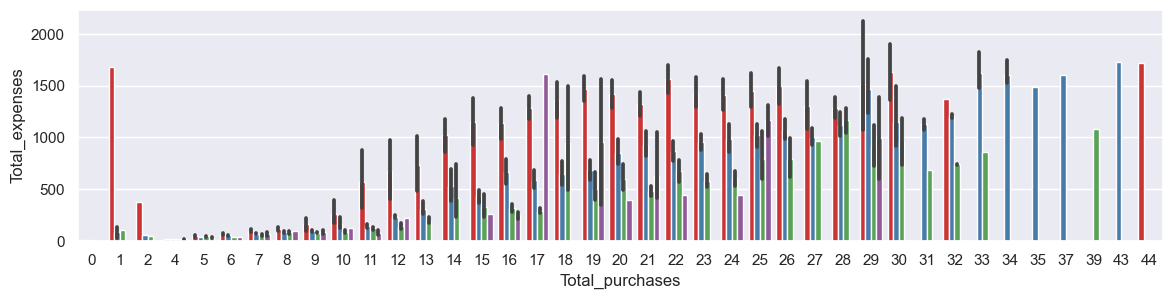

In [92]:
plt.figure(figsize=[14, 3])
sns.barplot(data = data2, x = 'Total_purchases', y= data2.Total_expenses,hue=data2.childrens, palette="Set1")
plt.title('Distribution of Total expenses based on Total purchases and childrens', fontsize = 16)
plt.xlabel('Total_purchases', fontsize = 12)
plt.ylabel('Total_expenses', fontsize = 12);
plt.show();

In [93]:
#Based on the graph,The total purchases is done by customers who have 0 or 1 children present in their home and the average spending of this customers is between 350 and 1200.



---



---


# OBSERVATIONS:-------------------------------------------------------------------


---


## Multivariate Analysis;--
***Conclusion based on previous visualization and statistics:***

    •	There is a positively correlation between Total purchases , Total expenses and income.

    •	The vast majority of customers who are in relationship and who have 0 or 1 childrens in their home are spending more on the products.

    •	There is medium positive corelation between income and Total purchases had been made.

    •	Total purchases had been done by customers who are in relationship and their average income is around 50,000.

    •	Total spending is done by customers who are in relationship and customers who mostly participated in 0th campaign and their average spending is around 350-600.

    •	The total purchases is done by customers who have 0 or 1 children present in their home and the average spending of this customers is between 350 and 1200.

  

---



---




## **Feature Scaling**

In [94]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
df_norm=StandardScaler().fit_transform(data3.iloc[:,1:])
df_norm

array([[ 0.23569584, -0.82521765, -0.92989438, ...,  1.67941681,
        -0.43903713,  1.32082612],
       [-0.23545419,  1.03255877,  0.90693402, ..., -0.96127545,
        -0.43903713, -1.15459595],
       [ 0.77399892, -0.82521765, -0.92989438, ...,  0.28267329,
        -0.43903713,  0.79968463],
       ...,
       [ 0.18947568, -0.82521765, -0.92989438, ...,  1.05495122,
         1.03539042,  0.53911389],
       [ 0.67940139, -0.82521765,  0.90693402, ...,  0.39394775,
        -0.43903713,  1.06025538],
       [ 0.02520835,  1.03255877,  0.90693402, ..., -0.7204576 ,
        -0.43903713, -0.50316909]])

## **KMeans Model Building**


---


The principle of KMeans Clustering is that the features be divided into K clusters in a way that each observation is belongs to the cluster having the nearest mean, or centroid. An important consideration for applying any clustering algorithm is to determine the 'k' that will yield the most accurate results. This can be done in many ways; some of the popular methods include:

1.The Elbow Method

2.The Silhouette Method-


*  Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.
*  The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters




---



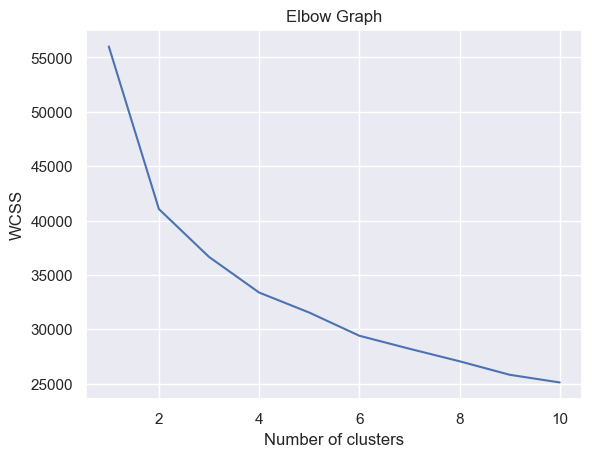

In [95]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.
# within-cluster sum-of-squares criterion
#suppose no. of clusters could be 10
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

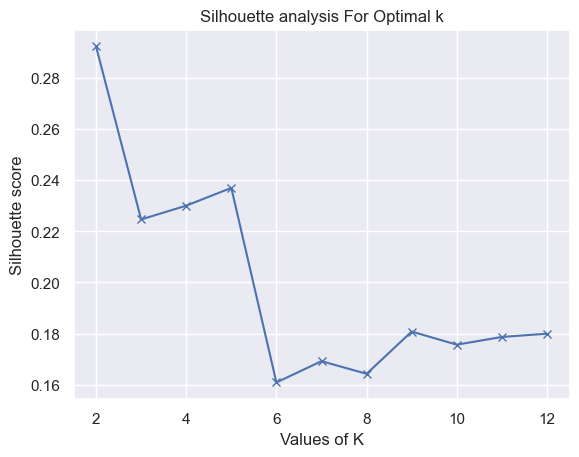

In [96]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
for num_clusters in range(2,13):

 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_norm)
 cluster_labels = kmeans.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(df_norm, cluster_labels))
plt.plot(range(2,13),silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [97]:
#We see that the silhouette score is maximized at k = 3. So, we will take 3 clusters.
# The silhouette Method is used in combination with the Elbow Method for a more confident decision.

### Build cluster algorithm using k=3

In [98]:
# Cluster algorithm using K=3
clusters3_predict=KMeans(n_clusters=3,random_state=42).fit_predict(df_norm)
clusters3_predict

array([1, 0, 2, ..., 1, 2, 0])

In [99]:
# Adding clusters to dataset as column i.e, clusterid
data3['clusters3id']= clusters3_predict
data3

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,childrens,Total_expenses,Total_campaign,Total_purchases,clusters3id
0,5524,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,57,0,1617,0,25,1
1,2174,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,60,2,27,0,6,0
2,4141,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,49,0,776,0,21,2
3,6182,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,30,1,53,0,8,0
4,5324,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,33,1,422,0,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,47,1,1341,0,18,2
2236,4001,64014.0,2,1,56,406,0,30,0,0,...,0,0,1,0,68,3,444,1,22,2
2237,7270,56981.0,0,0,91,908,48,217,32,12,...,1,0,0,0,33,0,1241,1,19,1
2238,8235,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,0,58,1,843,0,23,2


In [100]:
# Group data by Clusters (K=3)
data3.groupby('clusters3id').agg(['mean']).reset_index()

,clusters3id,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,childrens,Total_expenses,Total_campaign,Total_purchases
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5617.749767,35561.327264,0.781513,0.459384,49.273576,45.289449,4.988796,23.996265,7.407096,...,0.071895,0.010271,0.000000,0.000934,0.001867,42.788982,1.240896,102.553688,0.084967,8.091503
1,1,5675.433010,78433.310680,0.029126,0.097087,49.908738,640.464078,66.015534,483.510680,99.213592,...,0.089320,0.155340,0.304854,0.242718,0.038835,45.332039,0.126214,1434.833010,0.831068,20.545631
2,2,5484.678899,58920.074159,0.218654,0.905199,48.211009,462.495413,29.932722,151.773700,38.270642,...,0.061162,0.116208,0.009174,0.027523,0.012232,49.024465,1.123853,777.085627,0.226300,21.474006


## **ANALYSIS OF CLUSTERING RESULTS**

In [101]:
data3['clusters3id'].value_counts()

clusters3id
0    1071
2     654
1     515
Name: count, dtype: int64

## ***Distribution of customers based on cluster's ;***

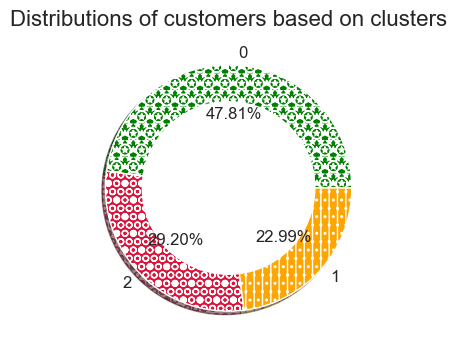

In [102]:
plt.figure(figsize=(4,4))
plt.title("Distributions of customers based on clusters",loc="center", fontsize=16)
mycolors = ["Green","crimson", "orange"]
plt.pie(data3.clusters3id.value_counts(),labels=data3.clusters3id.value_counts().index,colors=mycolors, autopct='%1.2f%%',shadow=True,textprops={'fontsize':12},hatch=['**O','O.O', '.||.'])
# autopct=show percentage with two decimal points
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.show()

In [103]:
#Most of the customers are categorized in cluster 2(47.38%) as compare to 0(29.48%) and (23.15%)  clusters.

## ***Cluster's profile based on Total_expenses ;***

In [104]:
data3.groupby("clusters3id")[['Total_expenses']].describe().T

clusters3id                     0            1            2
Total_expenses count  1071.000000   515.000000   654.000000
               mean    102.553688  1434.833010   777.085627
               std      92.065188   404.745872   337.632908
               min       5.000000    62.000000   241.000000
               25%      39.000000  1149.000000   494.250000
               50%      66.000000  1410.000000   726.000000
               75%     138.000000  1697.500000  1001.000000
               max     473.000000  2525.000000  1829.000000

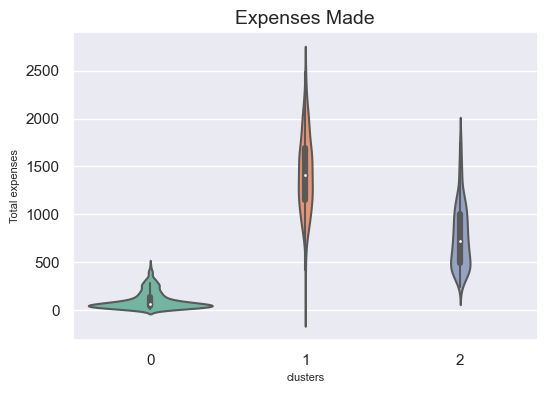

In [105]:
plt.figure(figsize=(6,4))
plt.title("Expenses Made", fontsize=14)
sns.violinplot(data3, x='clusters3id', y='Total_expenses', palette=sns.color_palette("Set2"))
plt.xlabel('clusters', fontsize = 8)
plt.ylabel('Total expenses', fontsize = 8)
plt.show();

In [106]:
#Customers of cluster 1 spends the most money on average followed by cluster 0.
#Customers of cluster 1 spends nearly 1.4k on average on products in the last couple of years.
#Customers of cluster 2 spends the least money on average.

## ***Cluster's profile based on Total_purchases ;***

In [107]:
data3.groupby("clusters3id")[['Total_purchases']].describe().T

clusters3id                      0           1           2
Total_purchases count  1071.000000  515.000000  654.000000
                mean      8.091503   20.545631   21.474006
                std       3.412872    4.625609    4.660127
                min       0.000000    1.000000   10.000000
                25%       5.000000   17.000000   18.000000
                50%       7.000000   20.000000   21.000000
                75%      10.000000   23.000000   25.000000
                max      19.000000   44.000000   39.000000

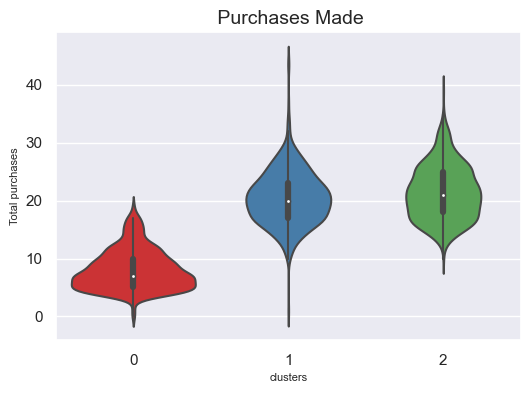

In [108]:
plt.figure(figsize=(6,4))
plt.title(" Purchases Made", fontsize=14)
sns.violinplot(data3, x='clusters3id', y='Total_purchases', palette=sns.color_palette("Set1"))
plt.xlabel('clusters', fontsize = 8)
plt.ylabel('Total purchases', fontsize = 8)
plt.show();

In [109]:
#Customers of cluster 0 have large amount of purchases.
#Customers of cluster 1 have moderate amount of purchases.
#Customers of cluster 2 have least amount of purchases.

## ***Cluster's profile based on Total_campaign ;***

In [110]:
data3.groupby("clusters3id")[['Total_campaign']].describe().T

clusters3id                     0           1           2
Total_campaign count  1071.000000  515.000000  654.000000
               mean      0.084967    0.831068    0.226300
               std       0.288839    1.069840    0.486428
               min       0.000000    0.000000    0.000000
               25%       0.000000    0.000000    0.000000
               50%       0.000000    0.000000    0.000000
               75%       0.000000    1.000000    0.000000
               max       2.000000    4.000000    3.000000

AttributeError: 'numpy.int32' object has no attribute 'startswith'

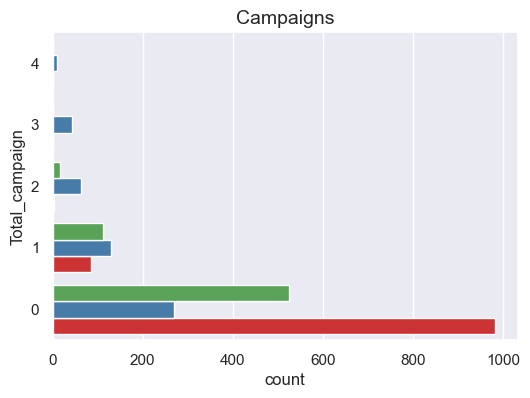

In [111]:
plt.figure(figsize=(6,4))
plt.title("Campaigns", fontsize=14)
sns.countplot(data3, hue='clusters3id', y='Total_campaign', palette=sns.color_palette("Set1"), orient='v')
plt.xlabel('clusters', fontsize = 8)
plt.ylabel('Total campaign', fontsize = 8)
plt.show();

In [ ]:
#Cluster 1 customers are the only customers who accepted more than 3 campaigns with some of them accepting even 5 campgains.
#Customers classified in cluster 0 didn't accept 3rd & 4th campaigns with very few of them accepting in 2nd campaign, mostly these customers accepted campaign in oth camapign around 500 customers and in 1st campaign around 100 customers.
#Most of the cluster 2 customers accepted campaigns in 0th campaign  and less than 50 of them accepted 1st campagin.

## ***Cluster's profile based on Income ;***

In [ ]:
data3.groupby("clusters3id")[['Income']].describe().T

In [ ]:
plt.figure(figsize=(6,4))
plt.title(" Number of Income", fontsize=14)
ax = sns.boxplot(data3, y='clusters3id', x='Income', palette=sns.color_palette("icefire"), showfliers=False, notch=True, showcaps=False, orient='h')
plt.ylabel("Clusters")
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
plt.title(" Number of Income", fontsize=14)
ax = sns.barplot(data3, hue='clusters3id', x='Income', palette=sns.color_palette("icefire"))#, showfliers=False, notch=True, showcaps=False, orient='h')
plt.ylabel("Clusters")
plt.show()

In [ ]:
#Cluster 1st customers have very high income as compare to 0th cluster of customers
#Cluster 2nd customers have low income as compare to 1st and 0th cluster's customers.

## ***Cluster's profile based on Education ;***

In [ ]:
merged_data = pd.merge(data3, data2)
merged_data.groupby("clusters3id")[['Education']].describe().T

In [ ]:
plt.figure(figsize=(7,3))
plt.title('Education Obtained', fontsize=14)
mycolors = ["Green","crimson", "orange"]
sns.countplot(data=merged_data, x=data2.Education, hue='clusters3id', palette='viridis')
plt.xlabel('cluster')
plt.ylabel('no. of customers')
plt.show()

In [ ]:
#Mostly cluster's 2 customers obtained the education and large amount(1004) of customers are post graduate as compare to graduate.
#Cluster's 0 & 1 customer's have around 655 and 516 post graduates and less undergraduate, as compare to post graduates.

## ***Cluster's profile based on Marital_Status ;***

In [ ]:
merged_data2 = pd.merge(data3, data2)
merged_data2.groupby("clusters3id")[['Marital_Status']].describe().T

In [ ]:
plt.figure(figsize=(7,3))
plt.title('Marital status Obtained', fontsize=14)
sns.countplot(data=merged_data2, x=merged_data2.Marital_Status, hue='clusters3id', palette="YlOrBr")
plt.xlabel('cluster')
plt.ylabel('No. of customers')
plt.show()

In [ ]:
#Nearly two thirds of cluster 0 and 2 customers are in a relationship.

## ***Cluster's profile based on Age ;***

In [ ]:
data3.groupby("clusters3id")[['Age']].describe().T

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Age status Obtained', fontsize=14)
sns.boxplot(data=data3, x=data3.Age, hue='clusters3id', palette="flare")
plt.xlabel('cluster')
plt.ylabel('No. of customers')
plt.show()

In [ ]:
#Cluster 0 customers are the oldest on average.
#Cluster 2 customers comes second when it comes to age.
#Cluster 1 customers are nearly 44 years old on average

## ***Cluster's profile based on Income and Total_expenses ;***

In [ ]:
data3.groupby("clusters3id")[['Income','Total_expenses']].describe().T

In [ ]:
plt.figure(figsize=[15, 4])
sns.scatterplot(data = data3, y = 'Income',x='Total_expenses', hue = 'clusters3id', color='Set1')
plt.title("Cluster's profile based on Income and Total_expenses", fontsize = 16)
plt.ylabel('Income', fontsize = 12)
plt.xlabel('Total expenses spent in last 2 years', fontsize = 12);
plt.show();

In [ ]:
#Customers of cluster 1 make the most money on average followed by cluster 0.
#Customers of cluster 1 made nearly 70k on average and spent 1.5k on products in the last couple of years.
#Customers of cluster 2 made the least money on average and spent least on products.
#Customers of cluster 0 made moderate amount of money i.e, 60k and spent 700 in average in last couple of years.

## ***Cluster's profile based on Total_campaign and Total_expenses ;***

In [112]:
data3.groupby("clusters3id")[['Total_campaign','Total_expenses']].describe().T

clusters3id                     0            1            2
Total_campaign count  1071.000000   515.000000   654.000000
               mean      0.084967     0.831068     0.226300
               std       0.288839     1.069840     0.486428
               min       0.000000     0.000000     0.000000
               25%       0.000000     0.000000     0.000000
               50%       0.000000     0.000000     0.000000
               75%       0.000000     1.000000     0.000000
               max       2.000000     4.000000     3.000000
Total_expenses count  1071.000000   515.000000   654.000000
               mean    102.553688  1434.833010   777.085627
               std      92.065188   404.745872   337.632908
               min       5.000000    62.000000   241.000000
               25%      39.000000  1149.000000   494.250000
               50%      66.000000  1410.000000   726.000000
               75%     138.000000  1697.500000  1001.000000
               max     473.000000  2525.000000  1829.000000

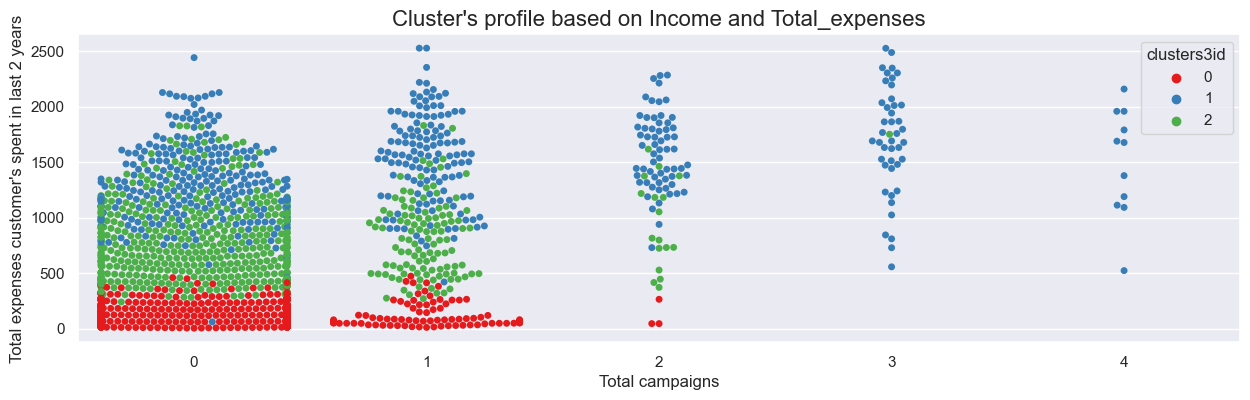

In [113]:
plt.figure(figsize=[15, 4])
sns.swarmplot(data = data3, x = 'Total_campaign',y='Total_expenses', hue = 'clusters3id', palette='Set1')
plt.title("Cluster's profile based on Income and Total_expenses", fontsize = 16)
plt.ylabel("Total expenses customer's spent in last 2 years", fontsize = 12)
plt.xlabel('Total campaigns', fontsize = 12);
plt.show();



---



---



# OBSERVATIONS:-------------------------------------------------------------------
## ***Analysis of clustering analysis;-***

###**Conclusion based on previous visualization and statistics:**

***Based on above information we can divide customers into 3 clusters:-***

    Diamond Customers: These customers belong to cluster 3.

    Gold Customers: These customers belong to cluster 1.

    Silver Customers: These customers belong to cluster 2.

**Characteristics of Diamond Customers;**

    •	Based on the total spendings: Customers of this cluster spent average on products.

    •	Based on the total purchases made: Customers of this cluster made more than 21 overall purchases on average.

    •	Based on the campaign: Customers of this cluster accepted the 0,1 & 2 campaigns.

    •	Based on income: Customers of this cluster make the most money on average.

    •	Based on education level: Post graduates.

    •	Based on marital status: Two thirds of customers are in a relationship.

    •	Based on age: Customers of this cluster are the oldest on average i.e, 49.

    •	Based on income & total expenses: Customers of this cluster made moderate amount of money i.e, 60k and spent 700 in average in last couple of years.



---


**Characteristics of Gold Customers;**

    •	Based on the total spendings: Customers of this cluster spent most money nearly 1.4k on average on products.

    •	Based on the total purchases made: Customers of this cluster made moderate amount of purchases on average i.e, 20.

    •	Based on the total campaign: Customers of this cluster are the only customers who accepted more than 3 campaigns with some of them accepting even 5 campgains.

    •	Based on income: Customers of this cluster make 77k on average.

    •	Based on education level: Post graduates.

    •	Based on marital status: Slightly less than half of them are single.

    •	Based on age: Customers of this cluster are 44 years old on average

    •	Based on income & total expenses: Customers of this cluster made large amount of money i.e, 70k and spent most around 1.5k on average in last couple of years.


---

**Characteristics of Silver Customers;**

    •	Based on the total spendings: Customers of this cluster spent least on products.

    •	Based on the total purchases made: Customers of this cluster made least amount of purchases on average i.e, 7.

    •	Based on the total campaign: Customers of this cluster accepted the 0 and 1 campaigns.

    •	Based on income: Customers of this cluster make 34k on average. That's nearly half of what diamond customers make.

    •	Based on education level: Post graduates.

    •	Based on marital status: Two thirds of customers are in a relationship.

    •	Based on age: Customers of this cluster are 41 years old on average.

    •	Based on income & total expenses: Customers of this cluster made least amount of money i.e, 60k and spent least around 65 on average in last couple of years.

---
---





# Classification Models

## Data Splitting

In [114]:
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score, make_scorer, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [115]:
# Prepare data for classification (using all columns)
X = data3.drop('clusters3id', axis=1)
y = data3['clusters3id']

In [116]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [117]:
# Initialize StandardScaler
scaler = StandardScaler()

In [118]:
# Scale the training and testing data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## KNN - K-Nearest Neighbors classifier

In [119]:
# Initialize K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

In [120]:
# Fit KNN to the scaled training data
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [121]:
# Get the parameters of the trained KNN model
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [122]:
# Predict labels using KNN on the scaled test data
y_pred = knn.predict(scaled_X_test)

## KNN Model Evaluation

Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       196
           1       0.95      0.91      0.93       113
           2       0.89      0.88      0.88       139

    accuracy                           0.93       448
   macro avg       0.93      0.92      0.92       448
weighted avg       0.93      0.93      0.93       448



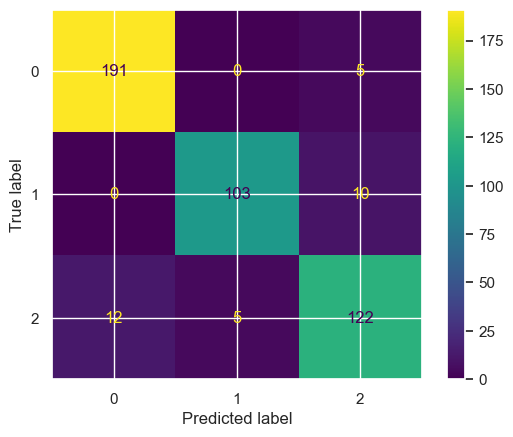

In [123]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# SVC - Support Vector Classifier

In [124]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [125]:
# Convert training and testing data to numpy arrays if they are not already
X_train_no_names = X_train.values if hasattr(X_train, 'values') else X_train
X_test_no_names = X_test.values if hasattr(X_test, 'values') else X_test

In [126]:
# Initialize and fit SVC model
svc_model = SVC()
svc_model.fit(X_train_no_names, y_train)

SVC()

In [127]:
# Predict the labels for the scaled test set using the best model
y_pred_svc = svc_model.predict(scaled_X_test)

## SVC Model Evaluation

Accuracy: 0.4375
Classification Report:
              precision    recall  f1-score   support

           0       0.44      1.00      0.61       196
           1       0.00      0.00      0.00       113
           2       0.00      0.00      0.00       139

    accuracy                           0.44       448
   macro avg       0.15      0.33      0.20       448
weighted avg       0.19      0.44      0.27       448



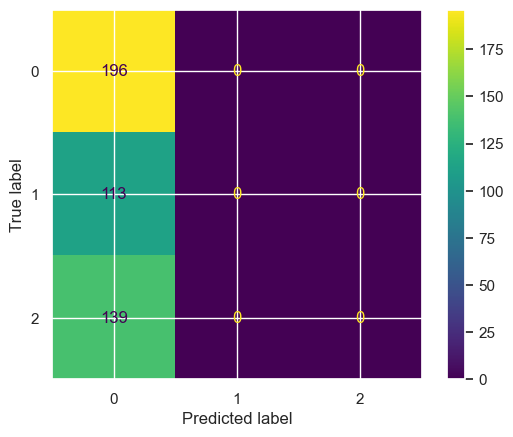

In [128]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svc))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

## SVC HyperParameter Tuning

In [129]:
# Define an instance of SVC
svc = SVC()

# Define a parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(scaled_X_train, y_train)

# Get the best estimator from GridSearchCV
best_model = grid_search.best_estimator_

In [130]:
# Fit the best model to the scaled training data
best_model.fit(scaled_X_train, y_train)

SVC(C=0.1, kernel='linear')

In [131]:
# Predict the labels for the scaled test set using the best model
y_pred_svc_new = best_model.predict(scaled_X_test)

## Model Evaluation

Accuracy: 0.9888392857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       196
           1       1.00      0.98      0.99       113
           2       0.98      0.99      0.98       139

    accuracy                           0.99       448
   macro avg       0.99      0.99      0.99       448
weighted avg       0.99      0.99      0.99       448



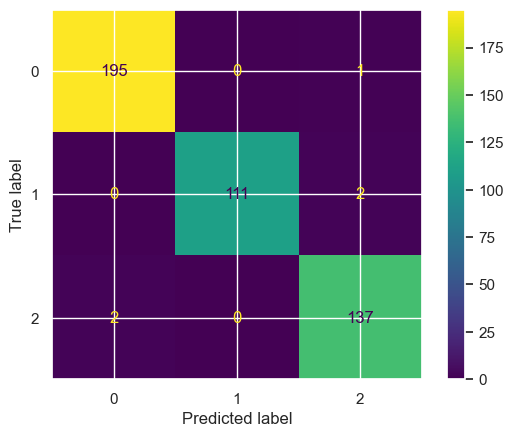

In [132]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc_new)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svc_new))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svc_new))

# Ensemble - Random Forest Classifier

In [133]:
# Initialize Random Forest Classifier
rfc_model = RandomForestClassifier()

In [134]:
# Fit the Random Forest model to the training data
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [135]:
# Predict labels using the trained Random Forest model on the test data
y_pred = rfc_model.predict(X_test)
y_pred

array([2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0,
       2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2,
       1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2,

## Model Evaluation

Accuracy: 0.9665178571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       196
           1       0.98      0.95      0.96       113
           2       0.94      0.96      0.95       139

    accuracy                           0.97       448
   macro avg       0.97      0.96      0.96       448
weighted avg       0.97      0.97      0.97       448



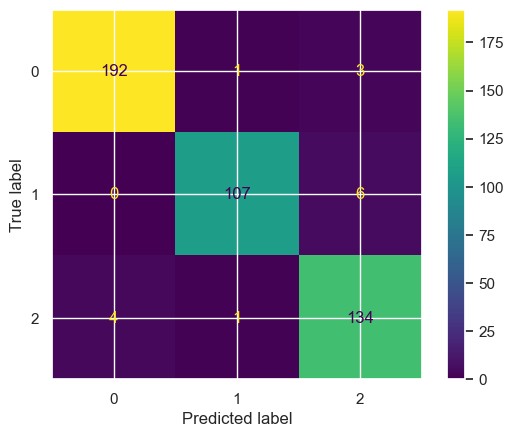

In [136]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

## Important Attribute

In [137]:
imp_feature = rfc_model.feature_importances_

# Get indices to sort feature importances in descending order
sorted_indices = np.argsort(imp_feature)[::-1]

# Sort feature importances and feature names accordingly
sorted_imp_feature = imp_feature[sorted_indices]
sorted_columns = X.columns[sorted_indices]

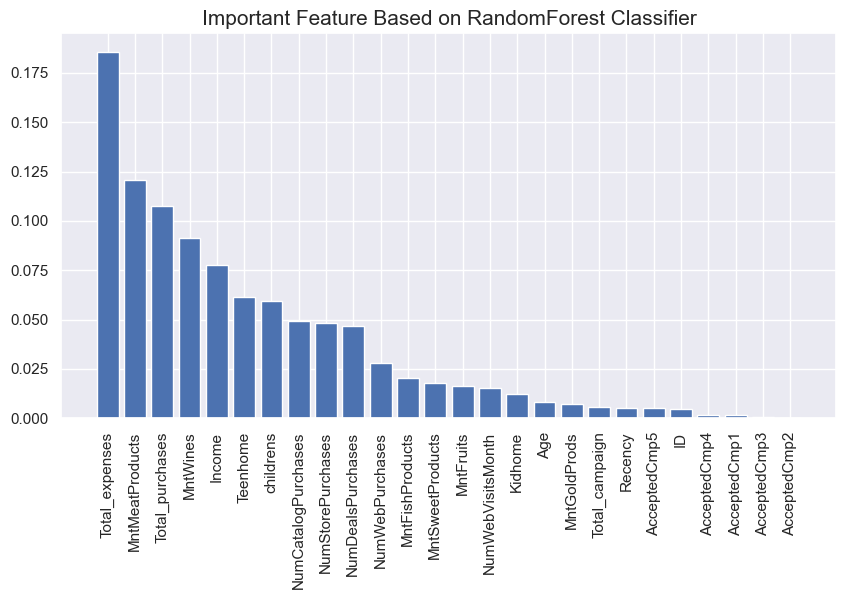

In [138]:
# Plot the sorted feature importances
plt.figure(figsize=(10,5))
plt.bar(x=sorted_columns, height=sorted_imp_feature)
plt.title('Important Feature Based on RandomForest Classifier', size=15)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## HyperParameter Tuning

In [139]:
# Initialize Random Forest Classifier
rfc = RandomForestClassifier()

# Create a scorer object for accuracy
scorer = make_scorer(accuracy_score)

# Define a parameter grid for GridSearchCV
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2, 3],
              'max_features': ['sqrt', 0.5]}

# Create GridSearchCV instance for hyperparameter tuning
rfc_grid = GridSearchCV(rfc, param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=3)

In [140]:
# Fit the classifier to the training data
rfc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [141]:
# Get the best estimator from GridSearchCV
rfc_grid.best_estimator_

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [142]:
# Predict labels on the test set using the best estimator
y_pred = rfc_grid.predict(X_test)
y_pred

array([2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0,
       2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2,
       1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0,
       1, 0, 1, 2, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2,

## Model Evaluation

Accuracy: 0.9620535714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       196
           1       0.97      0.94      0.95       113
           2       0.92      0.96      0.94       139

    accuracy                           0.96       448
   macro avg       0.96      0.96      0.96       448
weighted avg       0.96      0.96      0.96       448



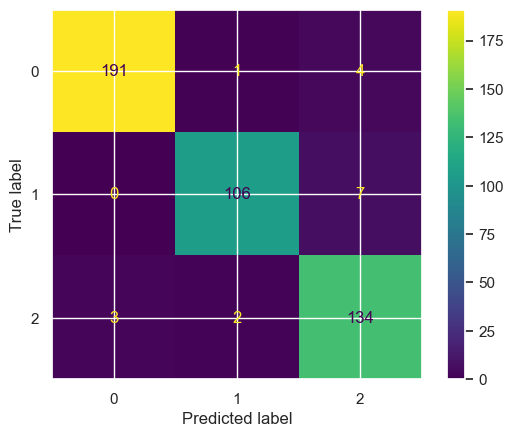

In [143]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Model Deployment

## Retrain SVC Model

In [144]:
svc_model = SVC(C=100, kernel='linear')
svc_model.fit(scaled_X_train, y_train)

SVC(C=100, kernel='linear')

In [145]:
import pickle

In [146]:
pickle.dump(svc_model, open('svc_model.pkl','wb'))